# Mental Health in Tech Survey

## Objectives

Mental illness, also called mental health disorders, refers to a wide range of mental health conditions — disorders that affect your mood, thinking and behavior. Examples of mental illness include depression, anxiety disorders, schizophrenia, eating disorders and addictive behaviors. 

People may have mental health conditions time to time. However, a mental health concern becomes a mental illness when ongoing signs and symptoms cause frequent stress and affect your ability to function.

With the Covid-19 situation and remote-work setting, mental health issues become more critical among people who work in the Tech. Better mental health can increase the overall productivity of employees and make them live a happier life. Therefore, this project tries to explore the behivor of different groups and find solutions to improve their mental health condition. 

## Questions

1. Will general demographic info (Age, Gender, etc.) impact people's intention to seek treatment?
2. Will mental health benefits encourage people to seek mental health help?
3. How does the inclusion at work place influence people to seek treatment?

## Data specification

This dataset is taken from Kaggle, [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. 

It contains the following columns and survey questions:

0. **Timestamp**
1. **Age**
2. **Gender**
3. **Country**
4. **state**: If you live in the United States, which state or territory do you live in?
5. **self_employed**: Are you self-employed?
6. **family_history**: Do you have a family history of mental illness?
7. **treatment**: Have you sought treatment for a mental health condition?
8. **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
9. **no_employees**: How many employees does your company or organization have?
10. **remote_work**: Do you work remotely (outside of an office) at least 50% of the time?
11. **tech_company**: Is your employer primarily a tech company/organization?
12. **benefits**: Does your employer provide mental health benefits?
13. **care_options**: Do you know the options for mental health care your employer provides?
14. **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
15. **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
16. **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
17. **leave**: How easy is it for you to take medical leave for a mental health condition?
18. **mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
19. **physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
20. **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
21. **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
22. **mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?
23. **physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?
24. **mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?
25. **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
26. **comments**: Any additional notes or comments

## Content
1. Dependent Library loading
2. Data Loading and Wrangling
  - 2.1 Data loading and exploring
  - 2.2 Data wrangling
  - 2.3 Feature Engineering
  - 2.4 Exploratory Data Analysis after encoding
3. Clustering
  - 3.1 K-means
  - 3.2 PCA
  - 3.3 Cluster interpretation
  - 3.4 K-means with one-hot encoding
4. Conclusion & Recommendation
  - 4.1 Summary
  - 4.2 Future work
  - 4.3 Scale up

## 1. Dependent Library loading

**Yellowbrick**, **tqdm**, and **kneed** libraries are used for this analysis. If they are not installed, you may need to use the following code to install them.

    `pip install yellowbrick`
    
    `pip install tqdm`
    
    `pip install kneed`

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [4]:
# load data process and visualization library
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing and clustering library
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans #, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# load clustering visualization library
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator
from tqdm import tqdm

# load system library
import sys
import warnings
warnings.filterwarnings("ignore")

# set parameters
RNDN = 42     # set the random state
nK = 12     # set maximum number of cluster

%matplotlib inline
pd.set_option("display.precision",2)
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

## 2. Data Loading and Wrangling

## 2.1 Data loading and exploring

In [5]:
# read the input csv files
df = pd.read_csv('../input/mental-health-in-tech-survey/survey.csv')

In [6]:
# check the shape of dataframe
df.shape

(1259, 27)

In [7]:
# check the first few rows
df.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

In [8]:
# check dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
# check the distribution of data frame
df.describe(include = 'all').T

count unique                              top  \
Timestamp                     1259   1246              2014-08-27 12:44:51   
Age                       1259.000    NaN                              NaN   
Gender                        1259     49                             Male   
Country                       1259     48                    United States   
state                          744     45                               CA   
self_employed                 1241      2                               No   
family_history                1259      2                               No   
treatment                     1259      2                              Yes   
work_interfere                 995      4                        Sometimes   
no_employees                  1259      6                             6-25   
remote_work                   1259      2                               No   
tech_company                  1259      2                              Yes   
benefits                      1259      3                              Yes   
care_options                  1259      3                               No   
wellness_program              1259      3                               No   
seek_help                     1259      3                               No   
anonymity                     1259      3                       Don't know   
leave                         1259      5                       Don't know   
mental_health_consequence     1259      3                               No   
phys_health_consequence       1259      3                               No   
coworkers                     1259      3                     Some of them   
supervisor                    1259      3                              Yes   
mental_health_interview       1259      3                               No   
phys_health_interview         1259      3                            Maybe   
mental_vs_physical            1259      3                       Don't know   
obs_consequence               1259      2                               No   
comments                       164    160  * Small family business - YMMV.   

                           freq         mean            std       min    25%  \
Timestamp                     2          NaN            NaN       NaN    NaN   
Age                         NaN 79428148.311 2818299442.982 -1726.000 27.000   
Gender                      615          NaN            NaN       NaN    NaN   
Country                     751          NaN            NaN       NaN    NaN   
state                       138          NaN            NaN       NaN    NaN   
self_employed              1095          NaN            NaN       NaN    NaN   
family_history              767          NaN            NaN       NaN    NaN   
treatment                   637          NaN            NaN       NaN    NaN   
work_interfere              465          NaN            NaN       NaN    NaN   
no_employees                290          NaN            NaN       NaN    NaN   
remote_work                 883          NaN            NaN       NaN    NaN   
tech_company               1031          NaN            NaN       NaN    NaN   
benefits                    477          NaN            NaN       NaN    NaN   
care_options                501          NaN            NaN       NaN    NaN   
wellness_program            842          NaN            NaN       NaN    NaN   
seek_help                   646          NaN            NaN       NaN    NaN   
anonymity                   819          NaN            NaN       NaN    NaN   
leave                       563          NaN            NaN       NaN    NaN   
mental_health_consequence   490          NaN            NaN       NaN    NaN   
phys_health_consequence     925          NaN            NaN       NaN    NaN   
coworkers                   774          NaN            NaN       NaN    NaN   
supervisor                  516          NaN            NaN       NaN    NaN   
ment

#### observation of data points
- **Age**: There are negative and extremely high age values, which could be wrong records.
- **Gender**: 49 labels of gender appear in the dataset, which means there could be different spellings.
- **Country**: There are 48 countries in the dataset. However, 751 of them are from the United States, which means it may not be good features.

## 2.2 Data wrangling

In [10]:
# Because timestamp is not needed for this analysis, it will be removed.
df= df.drop(['Timestamp'], axis= 1)

### 2.2.1 Age

1. Explore the outlier of age and remove the outlier if needed
2. Vsualize the trend

In [11]:
# histogram of Age
sns.set_style('darkgrid')
sns.set(font_scale = 2)
g = sns.FacetGrid(df, size=5)
g = sns.boxplot(x=df["Age"])
plt.title('The boxplot of age')
# plt.savefig('age.png', dpi = 80)

Text(0.5, 1.0, 'The boxplot of age')

#### Observation
There are errors in Age

In [12]:
# Generally, people under the age of 10 may not be able to work
df.loc[df['Age'] <=10]

Age              Gender         Country state self_employed  \
143    -29                Male   United States    MN            No   
715  -1726                male  United Kingdom   NaN            No   
734      5                Male   United States    OH            No   
989      8  A little about you    Bahamas, The    IL           Yes   
1127    -1                   p   United States    AL           Yes   

     family_history treatment work_interfere    no_employees remote_work  ...  \
143              No        No            NaN  More than 1000         Yes  ...   
715              No       Yes      Sometimes          26-100          No  ...   
734              No        No            NaN         100-500          No  ...   
989             Yes       Yes          Often             1-5         Yes  ...   
1127            Yes       Yes          Often             1-5         Yes  ...   

                   leave mental_health_consequence phys_health_consequence  \
143           Don't know                        No                      No   
715   Somewhat difficult                       Yes                      No   
734        Somewhat easy                        No                      No   
989            Very easy                       Yes                     Yes   
1127           Very easy                       Yes                     Yes   

         coworkers supervisor mental_health_interview phys_health_interview  \
143   Some of them        Yes                      No                    No   
715             No         No                      No                 Maybe   
734            Yes        Yes                      No                    No   
989            Yes        Yes                     Yes                   Yes   
1127           Yes        Yes                     Yes                   Yes   

     mental_vs_physical obs_consequence  \
143          Don't know              No   
715          Don't know              No   
734                 Yes              No   
989                 Yes             Yes   
1127                Yes             Yes   

                                               comments  
143                                                 NaN  
715                                                 NaN  
734   We had a developer suffer from depression and ...  
989                                                      
1127                                 password: testered  

[5 rows x 26 columns]

In [13]:
# Generally, people over the age of 100 may not work
df.loc[df['Age'] >= 100]

Age Gender        Country state self_employed family_history  \
364          329   Male  United States    OH            No             No   
390  99999999999    All       Zimbabwe   NaN           Yes            Yes   

    treatment work_interfere no_employees remote_work  ...           leave  \
364       Yes          Often         6-25         Yes  ...      Don't know   
390       Yes          Often          1-5          No  ...  Very difficult   

    mental_health_consequence phys_health_consequence     coworkers  \
364                     Maybe                      No  Some of them   
390                       Yes                     Yes            No   

    supervisor mental_health_interview phys_health_interview  \
364         No                      No                    No   
390         No                     Yes                    No   

    mental_vs_physical obs_consequence comments  
364                 No              No      NaN  
390                 No             Yes      NaN  

[2 rows x 26 columns]

In [14]:
# remove the records with Age under 10 and over 100
df_1 = df.loc[df['Age']>10].loc[df['Age']< 100]

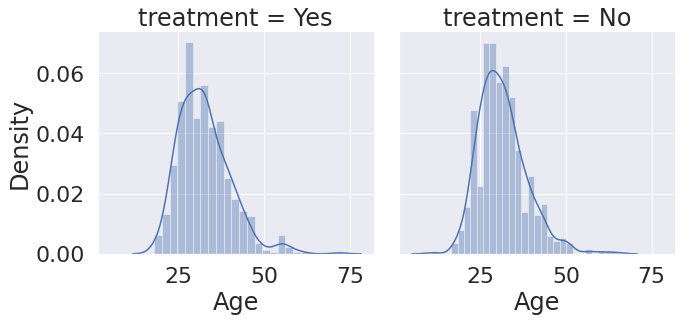

In [15]:
# plot the age distribution for different treatment group (True/False)
sns.set_style('darkgrid')
sns.set(font_scale = 2)
g = sns.FacetGrid(df_1, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

In [16]:
# set up additional feature: age range
df_1['age_range'] = pd.cut(df_1['Age'], [0,25,35,45,65,100], 
                           labels=["0-25", "26-35","36-45", "46-65", "66-100"], include_lowest=True)

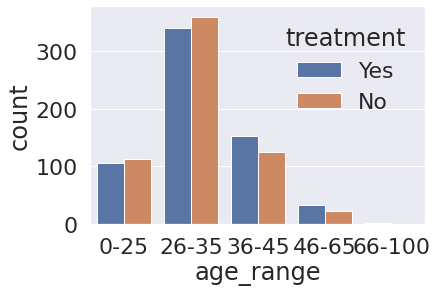

In [17]:
# plot the distribution of data within different age group for different treatment group (True/False)
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sns.countplot(x='age_range', hue= 'treatment', data= df_1)
plt.show()

#### Observation
There is no clear difference between the distribution of data within different age group for different treatment group (True/False)

### 2.2.2 Gender

1. Identity the unique value and combine them into different categories (remove errors if needed)
2. Visualize the demography

In [18]:
# list the unique value of Gender
df_1.Gender.str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [19]:
# check data frame shape
df_1.shape

(1252, 27)

In [20]:
df_2 = df_1.copy()

In [21]:
# Makee gender groups
male_str = [ "m","male", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", 
             "queer", "ostensibly male, unsure what that really means"]           
female_str = ["female","cis female", "f",  "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df_2.iterrows():

    if str.lower(col.Gender) in male_str:
        df_2['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df_2['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df_2['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

In [22]:
# check data frame shape again
df_2.shape

(1252, 27)

In [23]:
# Check the count for different genders within the dataset after cleaning
df_2.groupby('Gender')['Gender'].count().sort_values(ascending=False)

Gender
male      987
female    247
trans      18
Name: Gender, dtype: int64

In [24]:
# plot the distribution of data within different gender group for different treatment group (True/False)
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sns.countplot(x='Gender', hue= 'treatment', data= df_2 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [25]:
# plot the distribution of data within different gender group whether they are aware of care options
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sns.countplot(x='Gender', hue= 'care_options',
              data= df_2 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
Based on the survey data, there is a higher proportion of people in female group who have treatment and are aware of care options.

### 2.2.3 Country

1. Identify countries with the most respondents
2. Visualize the trend
3. We can keep this for now. It may need to be dropped after.

In [26]:
# list the unique value of Country
df_2.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [27]:
# list the count of country with top counts
df_country = df_2.groupby('Country')['Country'].count()
df_country = df_country[df_country >8].sort_values(ascending=False).to_frame(name = 'Count').reset_index()
df_country

Country  Count
0   United States    747
1  United Kingdom    184
2          Canada     72
3         Germany     45
4         Ireland     27
5     Netherlands     27
6       Australia     21
7          France     13
8           India     10

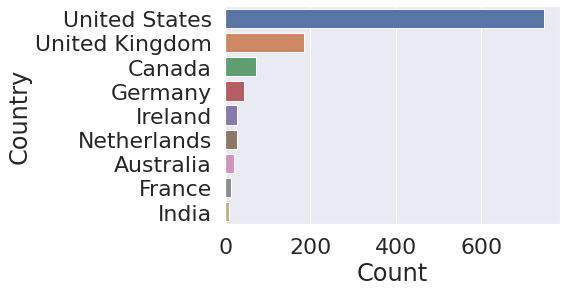

In [28]:
# plot the count of country with top counts
sns.set_style('darkgrid')
sns.set(font_scale = 2)
ax = sns.barplot(x="Count", y="Country", data=df_country)
plt.show()

#### Observation
People in United States, United Kingdom and Canada account for most of the survey respondents. Country may not be a good feature for us to conduct clusterng

### 2.2.4 state
#### (If you live in the United States, which state or territory do you live in?)

STEPs:
1. Identify state with the most respondents
2. Visualize the trend

In [29]:
# list the count of state with top counts
df_state = df_2.groupby('state')['state'].count()
df_state = df_state[df_state >20].sort_values(ascending=False).to_frame(name = 'Count').reset_index()
df_state

state  Count
0     CA    138
1     WA     70
2     NY     57
3     TN     45
4     TX     44
5     OR     29
6     PA     29
7     IL     28
8     OH     28
9     IN     27
10    MI     22

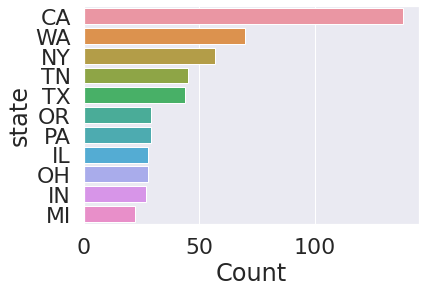

In [30]:
# plot the count of country with top counts
sns.set_style('darkgrid')
sns.set(font_scale = 2)
ax = sns.barplot(x="Count", y="state", data=df_state)
plt.show()

#### Observation
This feature is only for respondents in United States. Due to the small sample size. This will be dropped.

In [31]:
# drop the state column
df_3 = df_2.drop(['state'], axis= 1)

### 2.2.5 self_employed
#### (Are you self-employed?)

STEPs:
1. Identify unique repondents for self_employed and fill the hole for missing data
2. Visualize the trend

In [32]:
# list the unique value of self_employed
df_3.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [33]:
# check data frame shape
df_3.shape

(1252, 26)

In [34]:
# copy old data frame
df_4 = df_3.copy()

In [35]:
# Check the count for different employment status 
df_4.groupby('self_employed')['self_employed'].count()

self_employed
No     1091
Yes     143
Name: self_employed, dtype: int64

In [36]:
# check unique value of the no-employees column when self_employed is null
df_4[df_4.self_employed.isna()].no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [37]:
# The missing value for self_employed will be filled as Don't know
df_4.self_employed = df_4.self_employed.fillna('Don\'t Know')
# df_self_employed = df_4.groupby('self_employed')['self_employed'].count().to_frame(name = 'Count').reset_index()

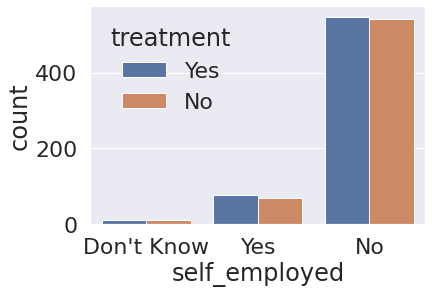

In [38]:
# plot the distribution of data at different employment status for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(x='self_employed', hue= 'treatment', data= df_4 )
plt.show()

#### Observation
Based on the survey data, the status of employment (self-employed or not) doesn't have an impact on whether they have chosen mental health treatment.

### 2.2.6 family_history
#### (Do you have a family history of mental illness?)

STEPs:
1. Identify unique repondents for family_history and fill the hole for missing data
2. Visualize the trend

In [39]:
# list the unique value of family history
df_4.family_history.unique()

array(['No', 'Yes'], dtype=object)

In [40]:
# Check the count for whether the respondents have family history of mental health condition
df_4.groupby('family_history')['family_history'].count()

family_history
No     763
Yes    489
Name: family_history, dtype: int64

In [41]:
# there is no missing value for family history column
df_4[df_4.family_history.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

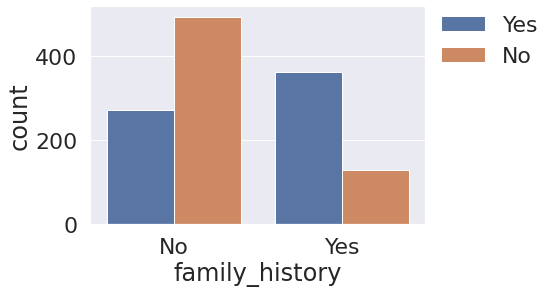

In [42]:
# plot the distribution of data with different family history for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(x='family_history', hue= 'treatment', data= df_4 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
Based on the survey, if the respondents have family history of mental health condition, there is a high chance they seek for mental health treatment

### 2.2.7 **treatment**
#### (Have you sought treatment for a mental health condition?)

STEPs:
1. Identify unique repondents for treatment
2. Visualize the proportion

In [43]:
# list the unique value of treatment
df_4.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [44]:
# there is no missing value for treatment column
df_4[df_4.treatment.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

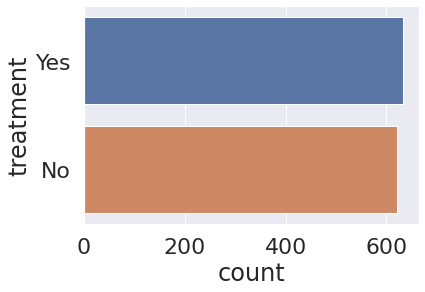

In [45]:
# plot the count for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(y='treatment',  data= df_4 )
plt.show()

#### Observation
Within the dataset, the number of respondents who seek for treatment or not is almost equal.

### 2.2.8 **work_interfere**
#### (If you have a mental health condition, do you feel that it interferes with your work?)

STEPs:
1. Identify unique repondents for work_interfere
2. Visualize the proportion

In [46]:
# list the unique value of work_interfere
df_4.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

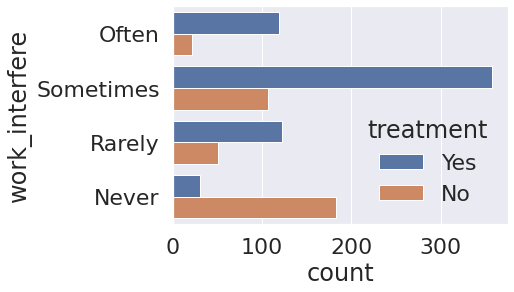

In [47]:
# plot the distribution of data with different work-interfere frequency for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(y='work_interfere',  hue = 'treatment', order = ['Often', 'Sometimes', 'Rarely', 'Never'], data= df_4 )
plt.show()

In [48]:
# Check the count for respondents with different work-interfere frequency
df_4.groupby('work_interfere')['work_interfere'].count()

work_interfere
Never        213
Often        140
Rarely       173
Sometimes    464
Name: work_interfere, dtype: int64

In [49]:
# check the top rows with work_interfere missing
df_4[df_4.work_interfere.isna()].head()

Age Gender        Country self_employed family_history treatment  \
19   36   male         France           Yes            Yes        No   
26   33   male  United States            No             No        No   
37   38   male       Portugal            No             No        No   
38   50   male  United States            No             No        No   
41   35   male  United States            No             No        No   

   work_interfere    no_employees remote_work tech_company  ...  \
19            NaN            6-25         Yes          Yes  ...   
26            NaN             1-5          No          Yes  ...   
37            NaN         100-500          No          Yes  ...   
38            NaN         100-500          No          Yes  ...   
41            NaN  More than 1000         Yes          Yes  ...   

   mental_health_consequence phys_health_consequence     coworkers  \
19                        No                      No  Some of them   
26                     Maybe                   Maybe  Some of them   
37                     Maybe                      No  Some of them   
38                        No                      No  Some of them   
41                       Yes                     Yes  Some of them   

      supervisor mental_health_interview phys_health_interview  \
19  Some of them                   Maybe                 Maybe   
26            No                      No                    No   
37  Some of them                      No                 Maybe   
38           Yes                      No                 Maybe   
41            No                      No                 Maybe   

   mental_vs_physical obs_consequence comments age_range  
19         Don't know              No      NaN     36-45  
26         Don't know              No      NaN     26-35  
37                 No              No      NaN     36-45  
38         Don't know              No      NaN     46-65  
41         Don't know              No      NaN     26-35  

[5 rows x 26 columns]

In [50]:
# copy the old data frame
df_5 = df_4.copy()

In [51]:
# Because there are 262 missing values, fill na value for work interfere as Don't know
df_5.work_interfere = df_5.work_interfere.fillna('Don\'t know')

In [52]:
# Check the count for respondents with different work-interfere frequency
df_5.groupby('work_interfere')['work_interfere'].count()

work_interfere
Don't know    262
Never         213
Often         140
Rarely        173
Sometimes     464
Name: work_interfere, dtype: int64

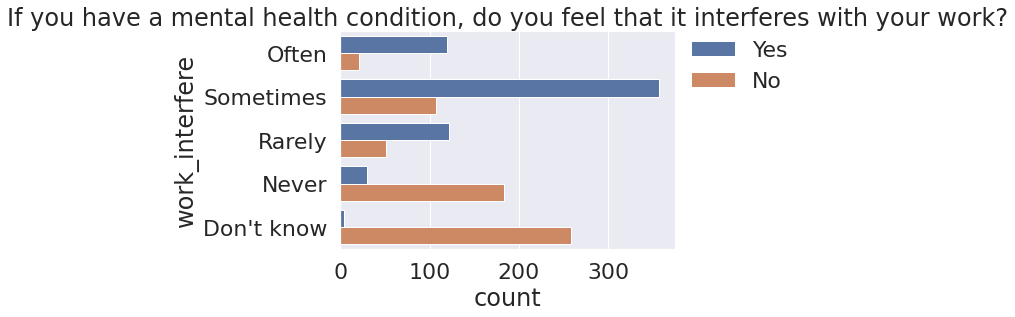

In [53]:
# plot the distribution of data with different work-interfere frequency for different treatment group (True/False) after cleaning
sns.set_style('darkgrid')
plt.title('If you have a mental health condition, do you feel that it interferes with your work?')
sns.countplot(y='work_interfere', hue = 'treatment', order = ['Often', 'Sometimes', 'Rarely', 'Never', 'Don\'t know'],  
              data= df_5 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
Based on the survey, if respondents feel they are interfered during work, they may seek mental health treatment.

### 2.2.9 no_employees
#### (How many employees does your company or organization have?)

STEPs:
1. Identify unique repondents for no_employees
2. Visualize the proportion

In [54]:
# list the unique value of no_employees
df_5.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [55]:
# check the missing value for no_employees
df_5[df_5.no_employees.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [56]:
# plot the distribution of data with different company size for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(y='no_employees', hue = 'treatment', order = ['1-5','6-25', '26-100', '100-500','500-1000', 'More than 1000'],
              data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
The size of company may have a slight impact on whether employees seek for mental health treatment. However, more data point is needed to prove this

### 2.2.10 remote_work
#### (Do you work remotely (outside of an office) at least 50% of the time?)

STEPs:
1. Identify unique repondents for remote_work
2. Visualize the proportion

In [57]:
# list the unique value of remote_work
df_5.remote_work.unique()

array(['No', 'Yes'], dtype=object)

In [58]:
# check the missing value for remote_work
df_5[df_5.remote_work.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

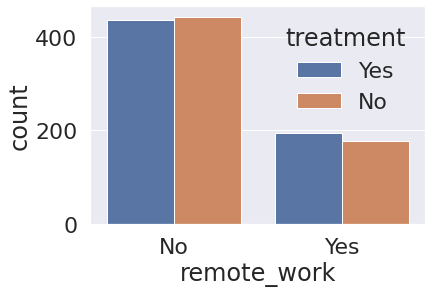

In [59]:
# plot whether remote work impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='remote_work', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
Based on the survey, remote work or not may not impact whether people seek mental health treatment.

### 2.2.11 tech_company
#### (Is your employer primarily a tech company/organization?)

STEPs:
1. Identify unique repondents for tech_company
2. Visualize the proportion

In [60]:
# list the unique value of tech_company
df_5.tech_company.unique()

array(['Yes', 'No'], dtype=object)

In [61]:
# check missing value for tech_company
df_5[df_5.tech_company.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [62]:
# plot whether tech company impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='tech_company', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
Whether people work in tech or not doesn't have a huge impact on their intention for treatment.

### 2.2.12 benefits
#### (Does your employer provide mental health benefits?)

STEPs:
1. Identify unique repondents for benefits
2. Visualize the proportion

In [63]:
# list the unique value of benefit
df_5.benefits.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [64]:
# check missing value for benefit
df_5[df_5.benefits.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

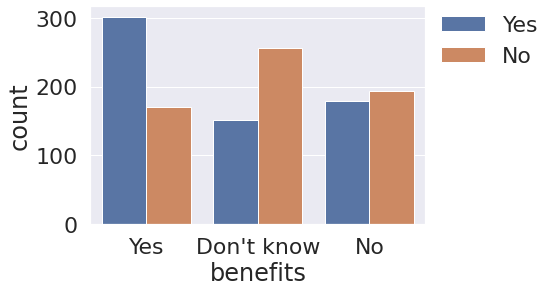

In [65]:
# plot how benefits plan impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='benefits', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
It will encourage employees to seek mental health treatment if their employer provide mental health benefits

### 2.2.13 care_options
#### (Do you know the options for mental health care your employer provides?)

STEPs:
1. Identify unique repondents for care_options
2. Visualize the proportion

In [66]:
# list the unique value of care_options
df_5.care_options.unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [67]:
# check missing value for care_options
df_5[df_5.care_options.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

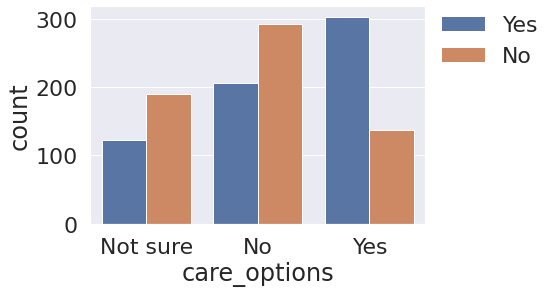

In [68]:
# plot how care_options impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='care_options', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
It will encourage employees to seek mental health treatment if their employer provide mental health care options.

### 2.2.14 wellness_program
#### (Has your employer ever discussed mental health as part of an employee wellness program?)

STEPs:
1. Identify unique repondents for wellness_program
2. Visualize the proportion

In [69]:
# list the unique value of wellness_program
df_5.wellness_program.unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [70]:
# check missing value for wellness_program
df_5[df_5.wellness_program.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

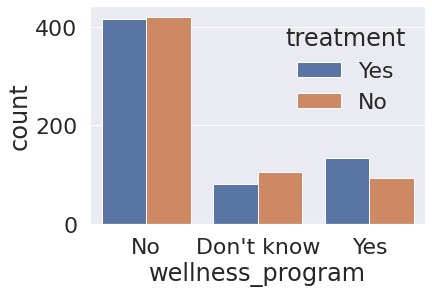

In [71]:
# plot how wellness_program impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='wellness_program', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
It may slightly encourage employees to seek mental health treatment if their employer discussed mental health as part of an employee wellness program. However, the trend is not strong.

### 2.2.15 seek_help
#### (Does your employer provide resources to learn more about mental health issues and how to seek help?)

STEPs:
1. Identify unique repondents for seek_help
2. Visualize the proportion

In [72]:
# list the unique value of seek_help
df_5.seek_help.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [73]:
# check missing value for seek_help
df_5[df_5.seek_help.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [74]:
# plot how seek_help impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='seek_help', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
It encourages employees to seek mental health treatment if their employer provide resources to learn more about mental health issues and how to seek help.

### 2.2.16 anonymity
#### (Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?)

STEPs:
1. Identify unique repondents for anonymity
2. Visualize the proportion

In [75]:
# list the unique value of anonymity
df_5.anonymity.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [76]:
# check missing value for anonymity
df_5[df_5.anonymity.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

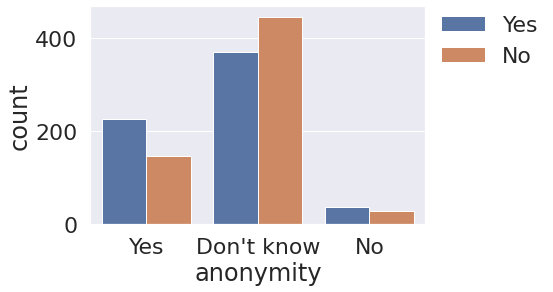

In [77]:
# plot how anonymity of mental health condition impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='anonymity', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
It encourages employees to seek mental health treatment if their anonymity is protected.

### 2.2.17 leave
#### (How easy is it for you to take medical leave for a mental health condition?)

STEPs:
1. Identify unique repondents for leave
2. Visualize the proportion

In [78]:
# list the unique value of leave
df_5.leave.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [79]:
# check missing value for leave
df_5[df_5.leave.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

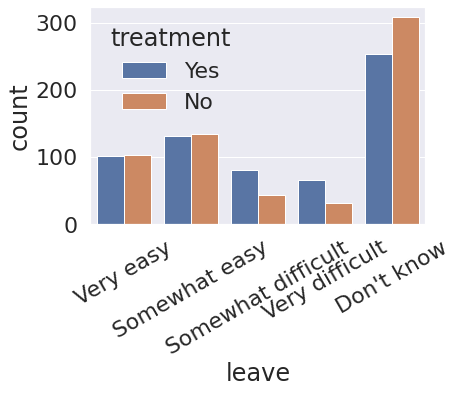

In [80]:
# plot how the difficulty of asking for leaving impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='leave', hue = 'treatment', order = ['Very easy','Somewhat easy', 'Somewhat difficult',
       'Very difficult', "Don't know" ], data= df_5)
plt.xticks(rotation = 30)
plt.show()

### 2.2.18 mental_health_consequence
#### (Do you think that discussing a mental health issue with your employer would have negative consequences?)

STEPs:
1. Identify unique repondents for mental_health_consequence
2. Visualize the proportion

In [81]:
# list the unique value of mental_health_consequence
df_5.mental_health_consequence.unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [82]:
# check missing value for mental_health_consequence
df_5[df_5.mental_health_consequence.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [83]:
# plot how the mental health consequence reduces the intention for mental health treatment
sns.set_style('darkgrid')
plt.title('Do you think that discussing a mental health issue with your employer would have negative consequences?')
sns.countplot(x='mental_health_consequence', hue = 'treatment',  data= df_5, order = ['No', "Yes" ,'Maybe'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 2.2.19 phys_health_consequence
#### (Do you think that discussing a physical health issue with your employer would have negative consequences?)

STEPs:
1. Identify unique repondents for phys_health_consequence
2. Visualize the proportion

In [84]:
# list the unique value of phys_health_consequence
df_5.phys_health_consequence.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [85]:
# check missing value for phys_health_consequence
df_5[df_5.phys_health_consequence.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

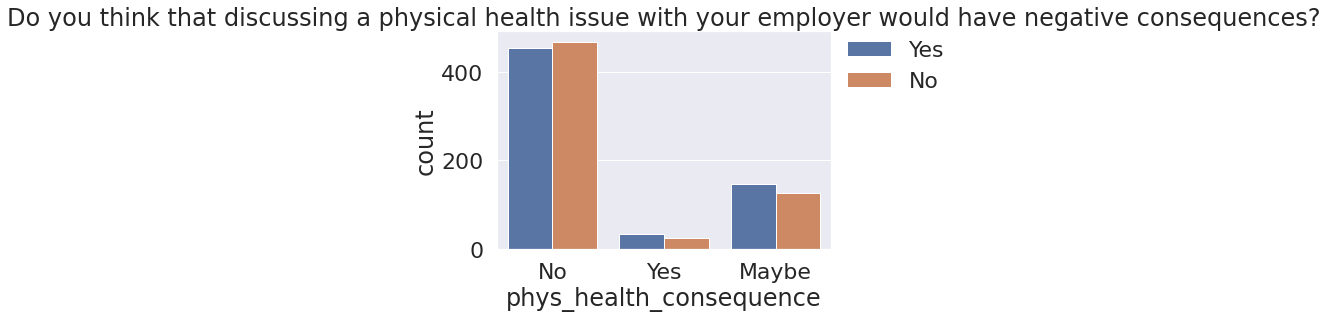

In [86]:
# plot how the physical health consequence reduces the intention for mental health treatment
sns.set_style('darkgrid')
plt.title('Do you think that discussing a physical health issue with your employer would have negative consequences?')
sns.countplot(x='phys_health_consequence', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation (leave, mental_health_consequence, phys_health_consequence)
1. Even thought some respondents think it is difficult to ask for leave, they will still seek for mental health treatment.
2. For respondents who feel it may have a negative effect to discuss mental health condition, they still have a higher ratio to seek for mental health treatment
3. Much less respondents think it will have a negative effect to discuss physical health condition


### 2.2.20 coworkers
#### (Would you be willing to discuss a mental health issue with your coworkers?)

STEPs:
1. Identify unique repondents for coworkers
2. Visualize the proportion

In [87]:
# list the unique value of coworkers
df_5.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [88]:
# check missing value for coworkers
df_5[df_5.coworkers.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [89]:
# plot how the willingness to discuss mental health conditions with coworkers impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='coworkers', hue = 'treatment',  data= df_5)
plt.show()

### 2.2.21 supervisor
#### (Would you be willing to discuss a mental health issue with your direct supervisor(s)?)

STEPs:
1. Identify unique repondents for supervisor
2. Visualize the proportion

In [90]:
# list the unique value of supervisor
df_5.supervisor.unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [91]:
# check missing value for supervisor
df_5[df_5.supervisor.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [92]:
# plot how the willingness to discuss mental health conditions with supervisors impacts 
# the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='supervisor', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation (coworkers & supervisors)
Based on the survey, it seems that if they are willing to talk about mental health condition with coworkers, there is a higher chance that they seek for mental health treatment. However, if they are willing to talk about mental health condition with supervisors, there is a lower chance that they will seek for mental health treatment.

### 2.2.22 mental_health_interview
#### (Would you bring up a mental health issue with a potential employer in an interview?)

STEPs:
1. Identify unique repondents for mental_health_interview
2. Visualize the proportion

In [93]:
# list the unique value of mental_health_interview
df_5.mental_health_interview.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [94]:
# check missing value for mental_health_interview
df_5[df_5.mental_health_interview.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

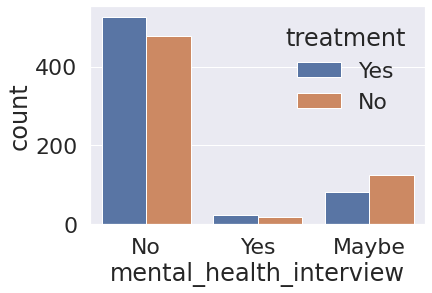

In [95]:
# plot how it impacts the intention for mental health treatment whether employees bring up a mental health issue 
# with a potential employer in an interview
sns.set_style('darkgrid')
sns.countplot(x='mental_health_interview', hue = 'treatment',  data= df_5)
plt.show()

### 2.2.23 phys_health_interview
#### (Would you bring up a physical health issue with a potential employer in an interview?)

STEPs:
1. Identify unique repondents for phys_health_interview
2. Visualize the proportion

In [96]:
# list the unique value of phys_health_interview
df_5.phys_health_interview.unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [97]:
# check missing value for phys_health_interview
df_5[df_5.phys_health_interview.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [98]:
# plot how it impacts the intention for physical health treatment whether employees bring up a mental health issue 
# with a potential employer in an interview
sns.set_style('darkgrid')
sns.countplot(x='phys_health_interview', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 2.2.24 mental_vs_physical
#### (Do you feel that your employer takes mental health as seriously as physical health?)

STEPs:
1. Identify unique repondents for mental_vs_physical
2. Visualize the proportion

In [99]:
# list the unique value of mental_vs_physical
df_5.mental_vs_physical.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [100]:
# check missing value for mental_vs_physical
df_5[df_5.mental_vs_physical.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

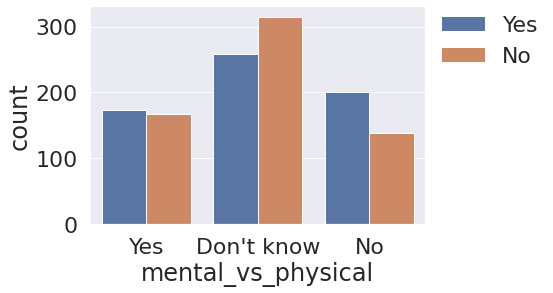

In [101]:
# plot how it impacts the intention for physical health treatment whether employees feel 
# that their employer takes mental health as seriously as physical health
sns.set_style('darkgrid')
sns.countplot(x='mental_vs_physical', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 2.2.25 obs_consequence
#### (Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?)

STEPs:
1. Identify unique repondents for obs_consequence
2. Visualize the proportion

In [102]:
# list the unique value of obs_consequence
df_5.obs_consequence.unique()

array(['No', 'Yes'], dtype=object)

In [103]:
# check missing value for obs_consequence
df_5[df_5.obs_consequence.isna()]

Empty DataFrame
Columns: [Age, Gender, Country, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments, age_range]
Index: []

[0 rows x 26 columns]

In [104]:
# plot how it impacts the intention for physical health treatment whether employees 
# heard of or observed negative consequences for coworkers with mental health conditions in your workplace
sns.set_style('darkgrid')
sns.countplot(x='obs_consequence', hue = 'treatment',  data= df_5)
plt.show()

#### Observation (mental_health_interview, phys_health_interview, mental_vs_physical, and obs_consequence)
1. Although compared to phys_health_interview, mental_health_interview doesn't change much on the ratio people seek for mental health treatment, less people are willing to talk about their mental health condition during the interview.
2. For the respondents who think their employer doesn't takes mental health as seriously as physical health, they have a higher ratio of seeking for mental health treatment.
3. Even if some respondents heard of or observed negative consequences for coworkers with mental health conditions in your workplace, they still have a higher tendency of seeking for mental health treatment.

### 2.2.26 comments
#### (Any additional notes or comments)

STEPs:
1. Identify unique repondents for comments

In [105]:
df_5.comments.unique()

array([nan,
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later',
       'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better',
       'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding mental he

**Because we don't conduct Natural Language Process here, this feature will be dropped**

In [106]:
df_6 = df_5.drop(['comments'], axis= 1)

In [107]:
df_6.shape

(1252, 25)

**Because most of the respondents are from US, UK, etc. and there are too many countries listed, this may not be a good feature. Therefore, Country_n is dropped.**

In [108]:
# drop the country_n column 
df_7 = df_6.drop(['Country'], axis= 1)
df_origin = df_6.drop(['Country'], axis= 1)

### 2.3 Feature Engineering
#### 2.3.1 Translate Categories to Numerical Variables - Encoding data

In [109]:
# helper function: translate category column to numerical column
def catcode(df, col): 
    df[col + "_n"] = df[col].astype("category").cat.codes
    df = df.drop(col, axis=1, inplace=True)

In [110]:
# create numerical columns from categories
_ = [catcode(df_7, col) for col in list(df_7.dtypes[df_7.dtypes == np.object].index)]
print(df_7.select_dtypes(exclude="object").nunique())

Age                            46
age_range                       5
Gender_n                        3
self_employed_n                 3
family_history_n                2
treatment_n                     2
work_interfere_n                5
no_employees_n                  6
remote_work_n                   2
tech_company_n                  2
benefits_n                      3
care_options_n                  3
wellness_program_n              3
seek_help_n                     3
anonymity_n                     3
leave_n                         5
mental_health_consequence_n     3
phys_health_consequence_n       3
coworkers_n                     3
supervisor_n                    3
mental_health_interview_n       3
phys_health_interview_n         3
mental_vs_physical_n            3
obs_consequence_n               2
dtype: int64


In [111]:
# print the unique value of age range
df_7['age_range'].unique()

['36-45', '26-35', '0-25', '46-65', '66-100']
Categories (5, object): ['0-25' < '26-35' < '36-45' < '46-65' < '66-100']

In [112]:
# set up additional feature age_range_n in category
df_7['age_range_n'] = 0
df_7.loc[df_7['age_range'] == '0-25','age_range_n']  = 0
df_7.loc[df_7['age_range'] == '26-35','age_range_n']  = 1
df_7.loc[df_7['age_range'] == '36-45','age_range_n']  = 2
df_7.loc[df_7['age_range'] == '46-65','age_range_n']  = 3
df_7.loc[df_7['age_range'] == '66-100','age_range_n']  = 4

### 2.3.2 Scaling

In [113]:
# check the shape of data frame
df_7.shape

(1252, 25)

In [114]:
# copy over the df_7 and drop age range
df_8 = df_7.copy().drop(['age_range'], axis= 1)

In [115]:
# check the first few columns of df_8
df_8.head()

Age  Gender_n  self_employed_n  family_history_n  treatment_n  \
0   37         0                0                 0            1   
1   44         1                0                 0            0   
2   32         1                0                 0            0   
3   31         1                0                 1            1   
4   31         1                0                 0            0   

   work_interfere_n  no_employees_n  remote_work_n  tech_company_n  \
0                 2               4              0               1   
1                 3               5              0               0   
2                 3               4              0               1   
3                 2               2              0               1   
4                 1               1              1               1   

   benefits_n  ...  leave_n  mental_health_consequence_n  \
0           2  ...        2                            1   
1           0  ...        0                            0   
2           1  ...        1                            1   
3           1  ...        1                            2   
4           2  ...        0                            1   

   phys_health_consequence_n  coworkers_n  supervisor_n  \
0                          1            1             2   
1                          1            0             0   
2                          1            2             2   
3                          2            1             0   
4                          1            1             2   

   mental_health_interview_n  phys_health_interview_n  mental_vs_physical_n  \
0                          1                        0                     2   
1                          1                        1                     0   
2                          2                        2                     1   
3                          0                        0                     1   
4                          2                        2                     0   

   obs_consequence_n  age_range_n  
0                  0            2  
1                  0            2  
2                  0            1  
3                  1            1  
4                  0            1  

[5 rows x 24 columns]

In [116]:
# Scaling the features
scaler = MinMaxScaler()
for i in df_8.columns:
    df_8[i] = scaler.fit_transform(np.array(df_8.loc[:,i]).reshape(-1,1))

In [117]:
# check the info of data frame after scaling
df_8.describe().T

count  mean   std   min   25%   50%   75%   max
Age                         1252.000 0.345 0.120 0.000 0.262 0.328 0.410 1.000
Gender_n                    1252.000 0.409 0.211 0.000 0.500 0.500 0.500 1.000
self_employed_n             1252.000 0.550 0.172 0.000 0.500 0.500 0.500 1.000
family_history_n            1252.000 0.391 0.488 0.000 0.000 0.000 1.000 1.000
treatment_n                 1252.000 0.505 0.500 0.000 0.000 1.000 1.000 1.000
work_interfere_n            1252.000 0.573 0.399 0.000 0.250 0.750 1.000 1.000
no_employees_n              1252.000 0.558 0.347 0.000 0.200 0.600 0.800 1.000
remote_work_n               1252.000 0.297 0.457 0.000 0.000 0.000 1.000 1.000
tech_company_n              1252.000 0.819 0.385 0.000 1.000 1.000 1.000 1.000
benefits_n                  1252.000 0.526 0.419 0.000 0.000 0.500 1.000 1.000
care_options_n              1252.000 0.476 0.433 0.000 0.000 0.500 1.000 1.000
wellness_program_n          1252.000 0.516 0.287 0.000 0.500 0.500 0.500 1.000
seek_help_n                 1252.000 0.454 0.346 0.000 0.000 0.500 0.500 1.000
anonymity_n                 1252.000 0.323 0.454 0.000 0.000 0.000 1.000 1.000
leave_n                     1252.000 0.352 0.377 0.000 0.000 0.250 0.500 1.000
mental_health_consequence_n 1252.000 0.425 0.383 0.000 0.000 0.500 0.500 1.000
phys_health_consequence_n   1252.000 0.414 0.242 0.000 0.500 0.500 0.500 1.000
coworkers_n                 1252.000 0.486 0.309 0.000 0.500 0.500 0.500 1.000
supervisor_n                1252.000 0.549 0.422 0.000 0.000 0.500 1.000 1.000
mental_health_interview_n   1252.000 0.434 0.213 0.000 0.500 0.500 0.500 1.000
phys_health_interview_n     1252.000 0.358 0.362 0.000 0.000 0.500 0.500 1.000
mental_vs_physical_n        1252.000 0.407 0.417 0.000 0.000 0.500 1.000 1.000
obs_consequence_n           1252.000 0.145 0.352 0.000 0.000 0.000 0.000 1.000
age_range_n                 1252.000 0.284 0.187 0.000 0.250 0.250 0.500 1.000

In [118]:
# check the first few columns of the df_8
df_8.head().T

0     1     2     3     4
Age                         0.426 0.541 0.344 0.328 0.328
Gender_n                    0.000 0.500 0.500 0.500 0.500
self_employed_n             0.000 0.000 0.000 0.000 0.000
family_history_n            0.000 0.000 0.000 1.000 0.000
treatment_n                 1.000 0.000 0.000 1.000 0.000
work_interfere_n            0.500 0.750 0.750 0.500 0.250
no_employees_n              0.800 1.000 0.800 0.400 0.200
remote_work_n               0.000 0.000 0.000 0.000 1.000
tech_company_n              1.000 0.000 1.000 1.000 1.000
benefits_n                  1.000 0.000 0.500 0.500 1.000
care_options_n              0.500 0.000 0.000 1.000 0.000
wellness_program_n          0.500 0.000 0.500 0.500 0.000
seek_help_n                 1.000 0.000 0.500 0.500 0.000
anonymity_n                 1.000 0.000 0.000 0.500 0.000
leave_n                     0.500 0.000 0.250 0.250 0.000
mental_health_consequence_n 0.500 0.000 0.500 1.000 0.500
phys_health_consequence_n   0.500 0.500 0.500 1.000 0.500
coworkers_n                 0.500 0.000 1.000 0.500 0.500
supervisor_n                1.000 0.000 1.000 0.000 1.000
mental_health_interview_n   0.500 0.500 1.000 0.000 1.000
phys_health_interview_n     0.000 0.500 1.000 0.000 1.000
mental_vs_physical_n        1.000 0.000 0.500 0.500 0.000
obs_consequence_n           0.000 0.000 0.000 1.000 0.000
age_range_n                 0.500 0.500 0.250 0.250 0.250

In [119]:
# check data frame info
df_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1252 non-null   float64
 1   Gender_n                     1252 non-null   float64
 2   self_employed_n              1252 non-null   float64
 3   family_history_n             1252 non-null   float64
 4   treatment_n                  1252 non-null   float64
 5   work_interfere_n             1252 non-null   float64
 6   no_employees_n               1252 non-null   float64
 7   remote_work_n                1252 non-null   float64
 8   tech_company_n               1252 non-null   float64
 9   benefits_n                   1252 non-null   float64
 10  care_options_n               1252 non-null   float64
 11  wellness_program_n           1252 non-null   float64
 12  seek_help_n                  1252 non-null   float64
 13  anonymity_n       

### 2.4 Exploratory Data Analysis after encoding

### 2.4.1 Covariance Matrix. Variability comparison between categories of variables

In [120]:
#correlation matrix
corrmat = df_8.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment_n')['treatment_n'].index
cm = np.corrcoef(df_8[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
# plt.savefig('cov.png')
plt.show()

# 3. Clustering

## 3.1 K-Means

### 3.1.1 Cluster Oprtimization

### call elbow plot for each of 3 alternative metrics
1. **distortion = mean sum of squared distances to center**
2. **silhouette = mean ratio of intra-cluster and nearest-cluster distance**
3. **calinski = ratio of within to between cluster dispersion**

In [121]:
# elbow score plot with Yellowbrick
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    sns.set(font_scale = 1.5)
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    #print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
    #         " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  

In [122]:
model = KMeans(random_state=RNDN)
_ = [elbowplot(df_8, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]

  0%|          | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):


 33%|███▎      | 1/3 [00:14<00:29, 14.72s/it]

Elbow Score Plot (silhouette metric):


 67%|██████▋   | 2/3 [00:28<00:14, 14.32s/it]

Elbow Score Plot (calinski_harabasz metric):


100%|██████████| 3/3 [00:43<00:00, 14.34s/it]


In [123]:
# kmeans: looking for the elbow - compare number of clusters by their inertia scores

# run kMeans for alternative number of clusters k
inertia_scores = [KMeans(
                    n_clusters=k, 
                    init='k-means++', 
                    n_init=10, max_iter=100, random_state=RNDN). \
                    fit(df_8).inertia_ \
                    for k in range(2,nK)]


dict_inertia = dict(zip(range(2,nK), inertia_scores))
print("inertia scores (sum of squared errors) by number of clusters:")
_ = [print(k, ":", f'{v:,.0f}') for k,v in dict_inertia.items()]

# scree plot: look for elbow
plt.figure(figsize=[8,5])
plt.plot(range(2,nK), inertia_scores, color="blue")
plt.title("inertia (sum of squared errors) vs. number of clusters")
plt.xticks(np.arange(2,nK,1.0))
plt.xlabel("number of clusters K")
plt.ylabel("inertia");

inertia scores (sum of squared errors) by number of clusters:
2 : 3,417
3 : 3,174
4 : 3,046
5 : 2,942
6 : 2,857
7 : 2,779
8 : 2,713
9 : 2,661
10 : 2,610
11 : 2,576


In [124]:
# inertia scores: confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concavem will detect knees
inertia_knee_a3 = KneeLocator(
        range(2,nK), 
        inertia_scores, 
        S=0.1, curve="convex", direction="decreasing")

K_inertia_a3 = inertia_knee_a3.elbow   
print("elbow at k =", f'{K_inertia_a3:.0f} clusters')

elbow at k = 5 clusters


In [125]:
# find maximum silhouette score for up to kN clusters
sil_scores = [silhouette_score(
                                df_8, 
                                KMeans(n_clusters=k, random_state=RNDN). \
                                fit_predict(df_8)) \
                                for k in tqdm(range(2,nK))]

dict_sil = dict(zip(range(2,nK), sil_scores))
print("silhouette scores:")
_ = [print(k, ":", f'{v:,.3f}') for k,v in dict_sil.items()]
K_sil_a3 = max(dict_sil, key=dict_sil.get)            # optimal clusters
sil_opt_a3 = dict_sil[K_sil_a3]                       # optimal silhouette score
print("maximum silhouette score for", f'{K_sil_a3:.0f} clusters: ', f'{sil_opt_a3:.3f}')

plt.figure(figsize=[7,5])
plt.plot(range(2,nK), sil_scores, color="red")
plt.title("silhouette scores vs. number of clusters")
plt.xticks(np.arange(2,nK,1))
plt.xlabel("number of clusters K")
plt.ylabel("silhouette score")
plt.show()

100%|██████████| 10/10 [00:15<00:00,  1.51s/it]


silhouette scores:
2 : 0.119
3 : 0.105
4 : 0.094
5 : 0.093
6 : 0.084
7 : 0.087
8 : 0.084
9 : 0.083
10 : 0.073
11 : 0.081
maximum silhouette score for 2 clusters:  0.119


**Reference**: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

In [126]:
# silhouette score plots with Yellowbrick
dict_score = dict()
fig, ax = plt.subplots(int(np.ceil(nK/2)-1), 2, figsize=(15,30))

for i in tqdm(range(2,nK)):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=RNDN)
    
    q, mod = divmod(i, 2)
    vis = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod], is_fitted=False)
    vis.fit(df_8)
    vis.finalize()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    dict_score[i] = vis.silhouette_score_


print("silhouette scores for k clusters:")
_ = [print(k,":",f'{v:.3f}') for k,v in dict_score.items()]

K_sil_a3 = max(dict_score, key=dict_score.get)          # optimal clusters
sil_opt_a3 = dict_score[K_sil_a3]                       # optimal (maximal) silhouette score
print("silhouette maximum score for", f'{K_sil_a3:.0f} clusters: ', f'{sil_opt_a3:.3f}')

100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


silhouette scores for k clusters:
2 : 0.119
3 : 0.105
4 : 0.094
5 : 0.093
6 : 0.084
7 : 0.087
8 : 0.084
9 : 0.083
10 : 0.073
11 : 0.081
silhouette maximum score for 2 clusters:  0.119


### 3.1.2 KMeans mapping

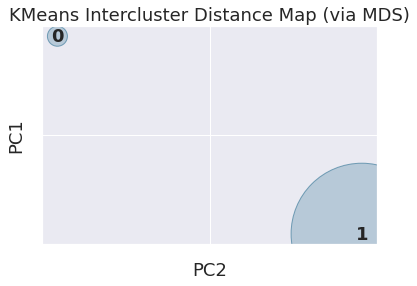

In [127]:
# optimal number of clusters: intercluster distances
model = KMeans(
    n_clusters=K_sil_a3, init='k-means++', n_init=10, max_iter=100, random_state=RNDN)
visD = InterclusterDistance(
    model, max_size=20000, legend=False, random_state=RNDN)
visD.fit(df_8)
visD.finalize()

100%|██████████| 6/6 [00:09<00:00,  1.53s/it]


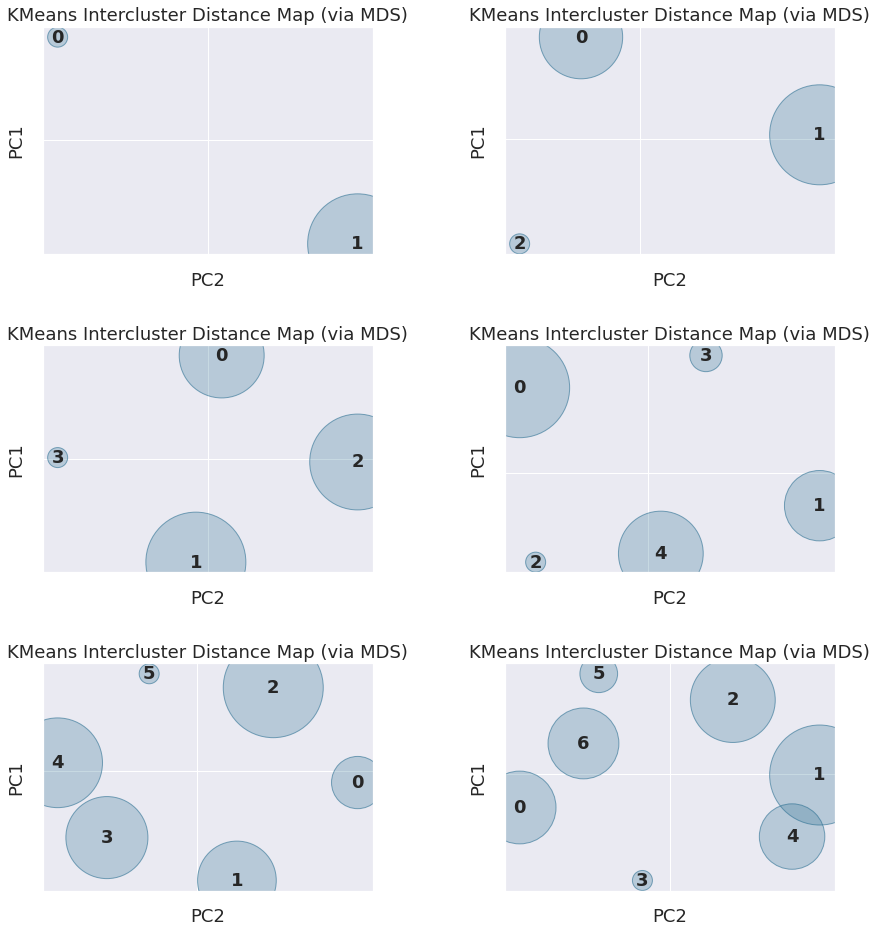

In [128]:
# intercluster distance maps: alternative numbers of clusters
dict_score = dict()
nK = 8
fig, ax = plt.subplots(int(np.ceil(nK/2))-1, 2, figsize=(10,15))

for i in tqdm(range(2,nK)):
    km = KMeans(
                n_clusters=i, 
                init='k-means++', n_init=10, max_iter=100, random_state=RNDN)
    
    q, mod = divmod(i, 2)
    vis = InterclusterDistance(
        km, ax=ax[q-1][mod], max_size=10000, legend=False, random_state=RNDN)
    vis.fit(df_8)
    vis.finalize()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    dict_score[i] = vis.scores_

### 3.1.3 Clustering training

In [129]:
# training: generate "Cluster" column based on optimal number of clusters
model = KMeans(n_clusters=K_sil_a3, random_state=RNDN)
res = model.fit_predict(df_8)
df_8.insert(0, "Cluster", res)     # insert cluster labels as new column
df_8.tail()

Cluster   Age  Gender_n  self_employed_n  family_history_n  treatment_n  \
1254        0 0.246     0.500            0.500             0.000        1.000   
1255        1 0.344     0.500            0.500             1.000        1.000   
1256        1 0.377     0.500            0.500             1.000        1.000   
1257        0 0.574     0.000            0.500             0.000        0.000   
1258        1 0.230     0.500            0.500             1.000        1.000   

      work_interfere_n  no_employees_n  remote_work_n  tech_company_n  ...  \
1254             0.000           0.400          0.000           1.000  ...   
1255             0.500           0.400          1.000           1.000  ...   
1256             1.000           1.000          0.000           1.000  ...   
1257             0.000           0.200          1.000           1.000  ...   
1258             1.000           0.400          0.000           0.000  ...   

      leave_n  mental_health_consequence_n  phys_health_consequence_n  \
1254    0.500                        0.500                      0.500   
1255    0.250                        0.500                      0.500   
1256    0.250                        1.000                      1.000   
1257    0.000                        1.000                      0.500   
1258    0.000                        0.000                      0.500   

      coworkers_n  supervisor_n  mental_health_interview_n  \
1254        0.500         0.500                      0.500   
1255        0.500         1.000                      0.500   
1256        0.000         0.000                      0.500   
1257        0.000         0.000                      0.500   
1258        0.500         0.000                      0.500   

      phys_health_interview_n  mental_vs_physical_n  obs_consequence_n  \
1254                    0.500                 0.000              0.000   
1255                    0.500                 1.000              0.000   
1256                    0.500                 0.500              0.000   
1257                    0.500                 0.500              0.000   
1258                    0.500                 0.000              0.000   

      age_range_n  
1254        0.250  
1255        0.250  
1256        0.250  
1257        0.750  
1258        0.000  

[5 rows x 25 columns]

In [130]:
# training: get silhouette score
sil_train = silhouette_score(df_8, res)
print("training: silhouette score for", f'{K_sil_a3:.0f} clusters: {sil_train:.3f}')

training: silhouette score for 2 clusters: 0.178


## 3.2 Principle Component Analysis

interpret the clusters with Principle Component Analysis

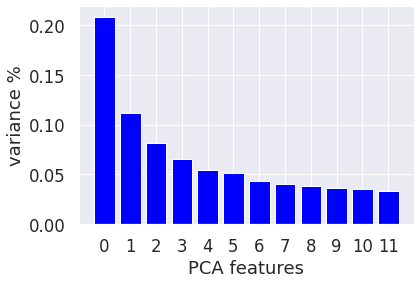

In [131]:
# principal components
pca = PCA(n_components=12)
res_pca = pca.fit_transform(df_8)

# scree plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="blue")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

df_8_pca = pd.DataFrame(res_pca)

df_8_pca.insert(0, "Cluster", res)

In [132]:
# set the column names
df_8_pca.columns = ['Cluster', 'pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 
                    'pca_5','pca_6','pca_7','pca_8','pca_9', 'pca_10', 'pca_11']

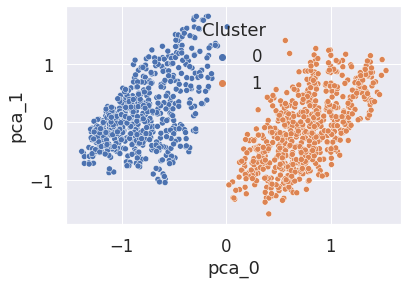

In [133]:
# plot first 2 components to see if there are any clear clusters
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(data=df_8_pca, x="pca_0", y="pca_1", hue="Cluster")
plt.show()

In [134]:
# print first few columns of df_8_pca
df_8_pca.head()

Cluster  pca_0  pca_1  pca_2  pca_3  pca_4  pca_5  pca_6  pca_7  pca_8  \
0        1  0.754  0.877 -0.173 -0.195 -0.274 -0.579 -0.238  0.088  0.216   
1        0 -1.120 -0.867 -0.683 -0.237 -0.081 -0.131  0.569  0.566 -0.235   
2        0 -0.781  0.167  0.087 -0.646 -0.084 -0.279  0.203 -0.787 -0.190   
3        1  0.911 -0.245 -0.387  0.299  0.614 -0.170 -0.496 -0.168  0.197   
4        0 -0.991 -0.148  0.486  0.142 -0.444  0.494  0.351 -0.659 -0.437   

   pca_9  pca_10  pca_11  
0 -0.356   0.226  -0.316  
1 -0.266  -0.277   0.076  
2 -0.287   0.148  -0.050  
3  0.642  -0.103   0.140  
4 -0.086  -0.023  -0.124

## 3.3 Cluster interpretation

In [135]:
# check the dimension of cluster array
len(res)

1252

In [136]:
# check the dimension of data frame before converting categorical data into numerical data
df_origin.shape

(1252, 24)

In [137]:
# insert cluster result into data frame
df_9 = df_origin.copy()
df_9.insert(0, 'Cluster', res)
print(df_9.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Cluster                    1252 non-null   int32   
 1   Age                        1252 non-null   int64   
 2   Gender                     1252 non-null   object  
 3   self_employed              1252 non-null   object  
 4   family_history             1252 non-null   object  
 5   treatment                  1252 non-null   object  
 6   work_interfere             1252 non-null   object  
 7   no_employees               1252 non-null   object  
 8   remote_work                1252 non-null   object  
 9   tech_company               1252 non-null   object  
 10  benefits                   1252 non-null   object  
 11  care_options               1252 non-null   object  
 12  wellness_program           1252 non-null   object  
 13  seek_help                  1252 n

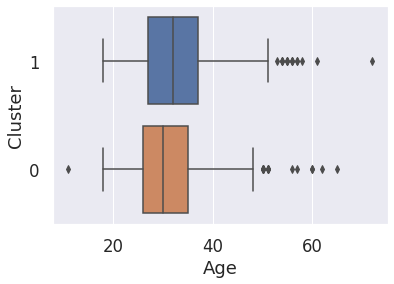

In [138]:
# plot the boxplot of age distribution for different clusters
df_10 = df_9.copy()
df_10.Cluster = df_10.Cluster.astype('string')
ax = sns.boxplot(x="Age", y="Cluster", data=df_10)

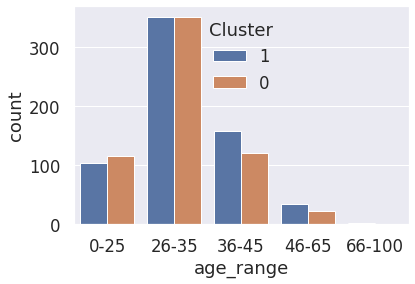

In [139]:
# plot the age range distribution for different clusters
sns.set_style('darkgrid')
sns.countplot(x='age_range', hue = 'Cluster',  data= df_10)
plt.show()

In [140]:
# find the columns with categorical datatype
lis = list(set(df_9.columns) - set(['Cluster', 'Age', 'age_range']))

#### Pie chart to compare the portion of respose on survey questions for different clusters

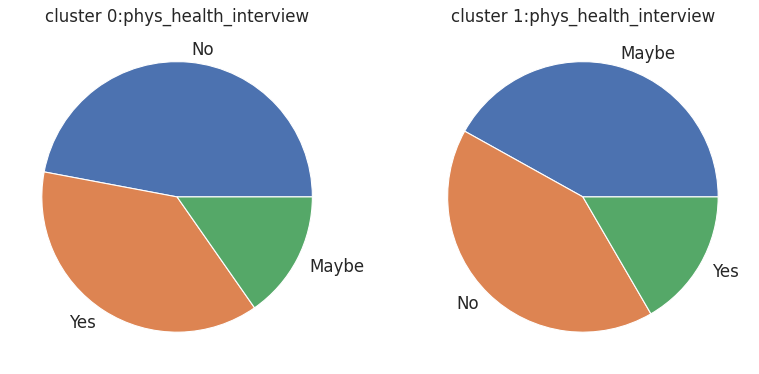

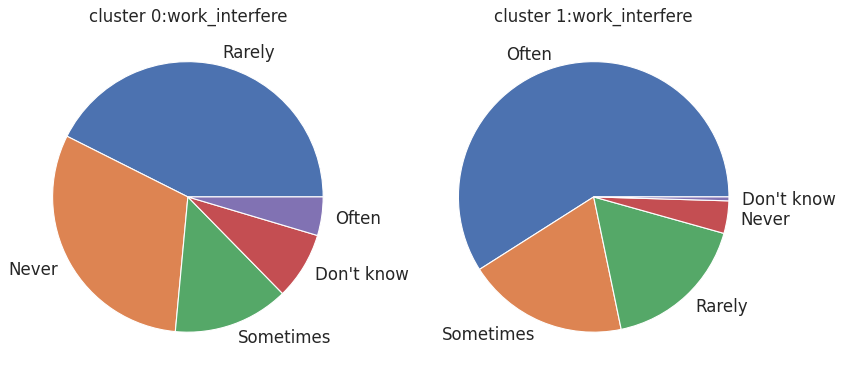

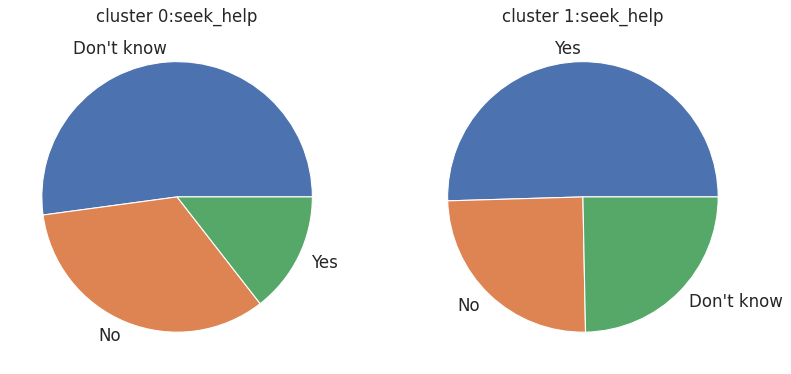

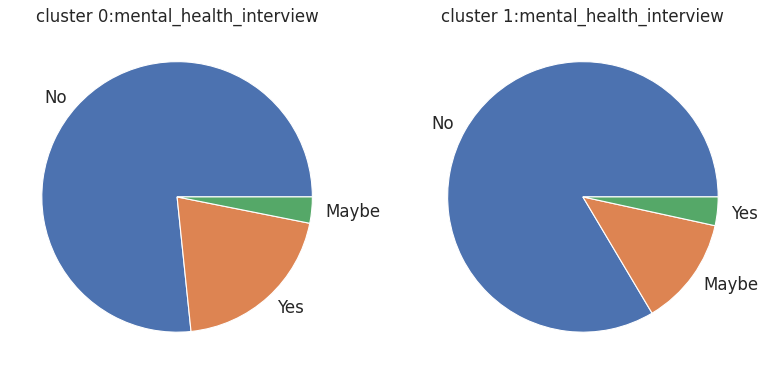

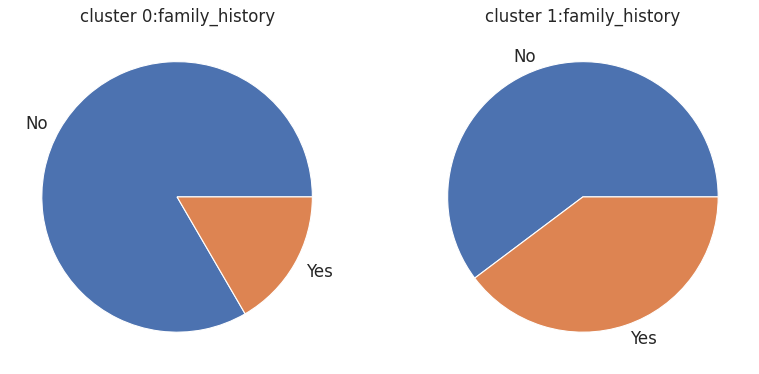

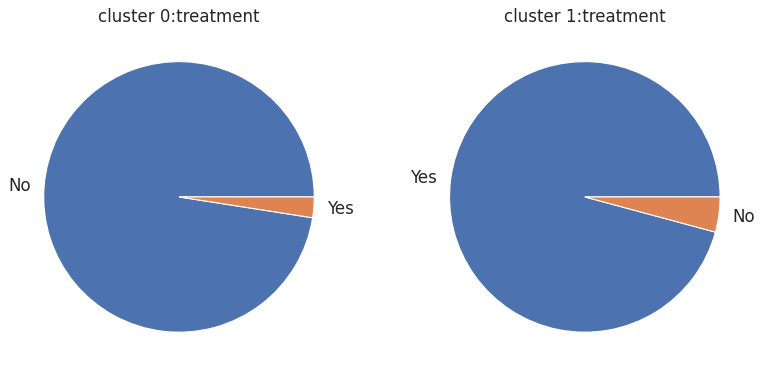

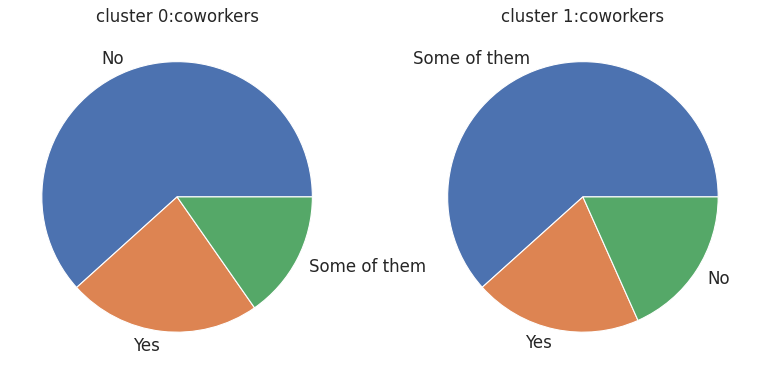

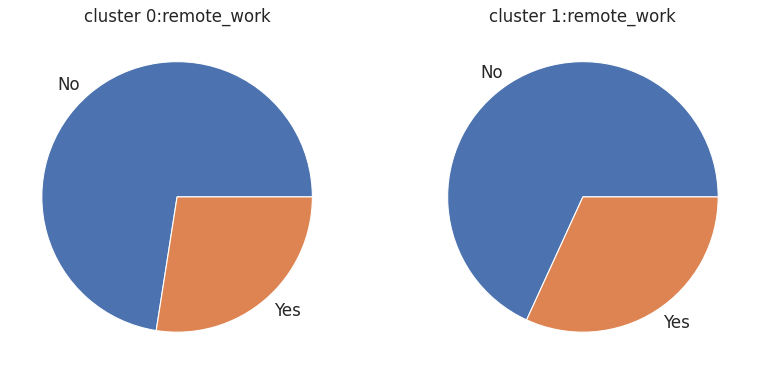

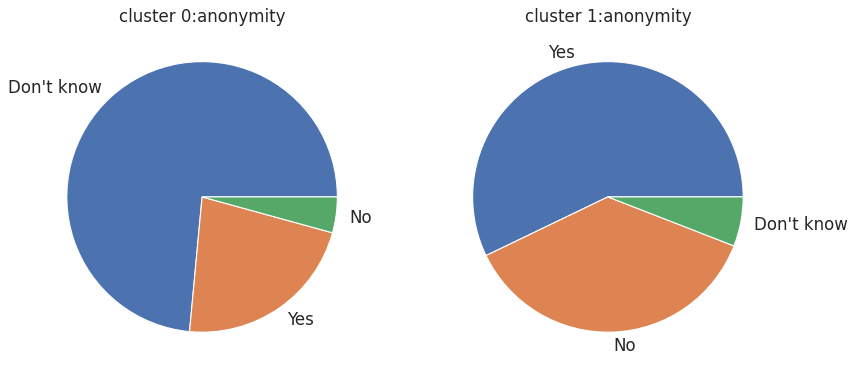

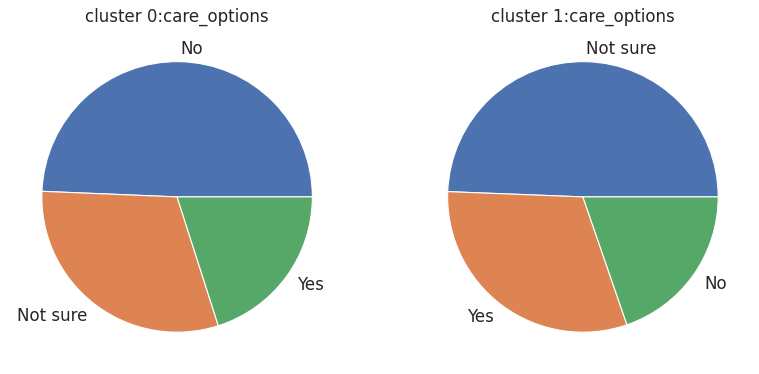

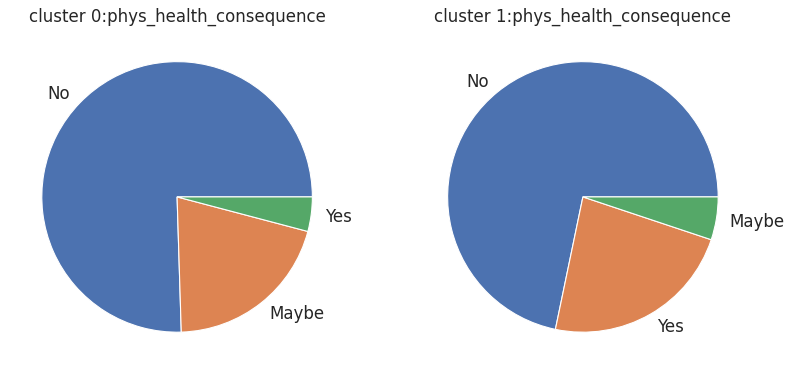

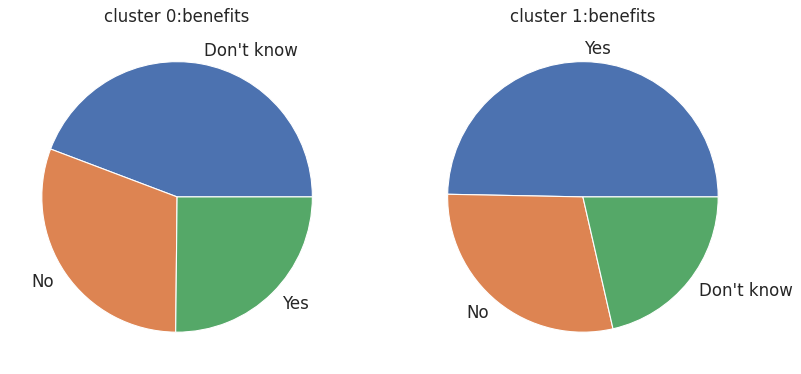

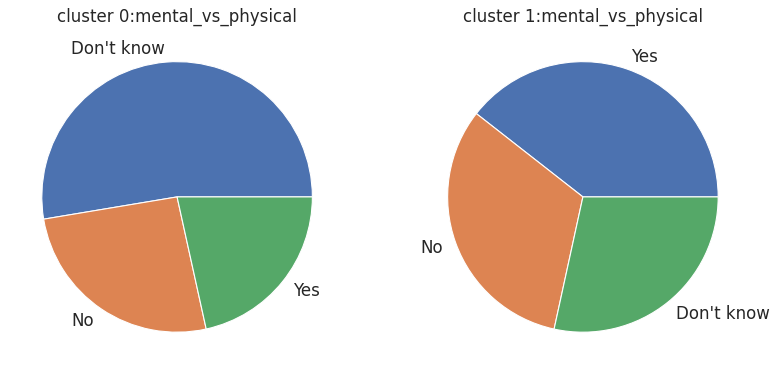

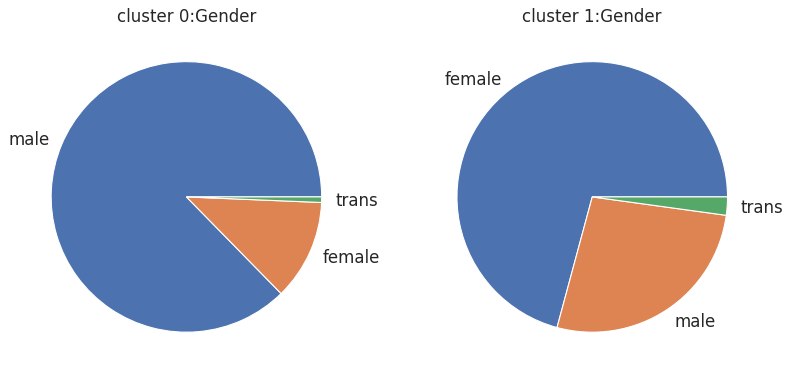

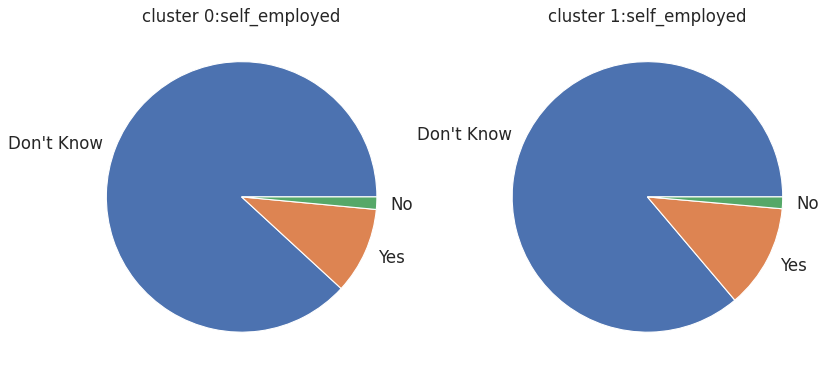

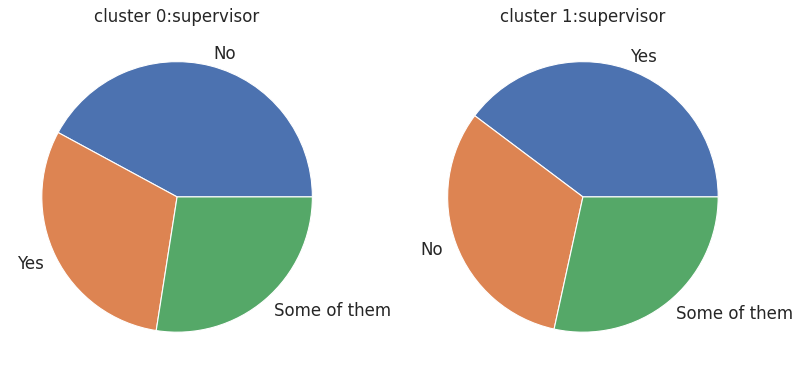

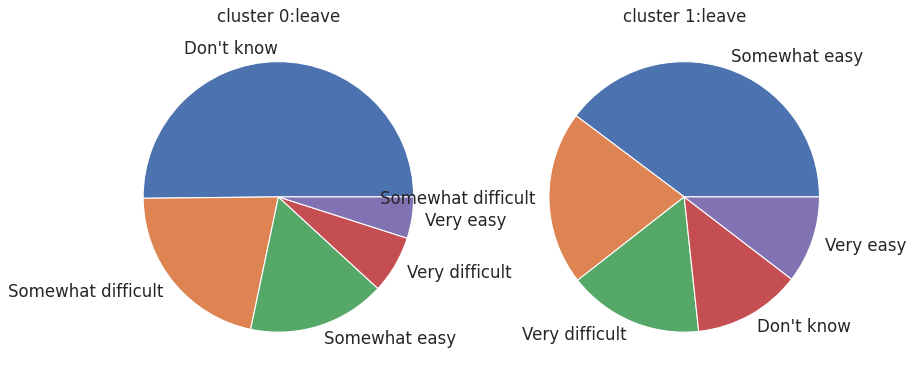

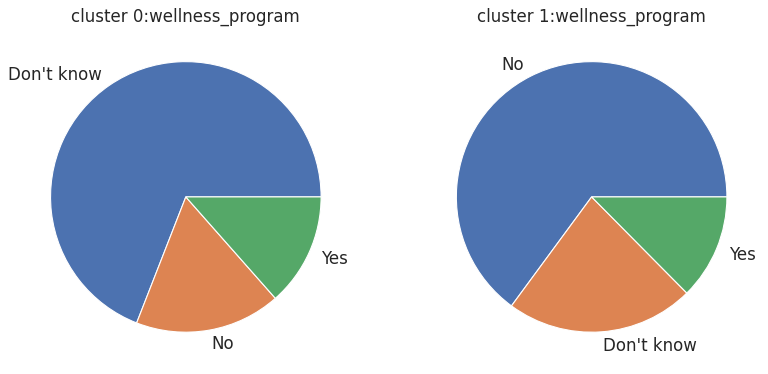

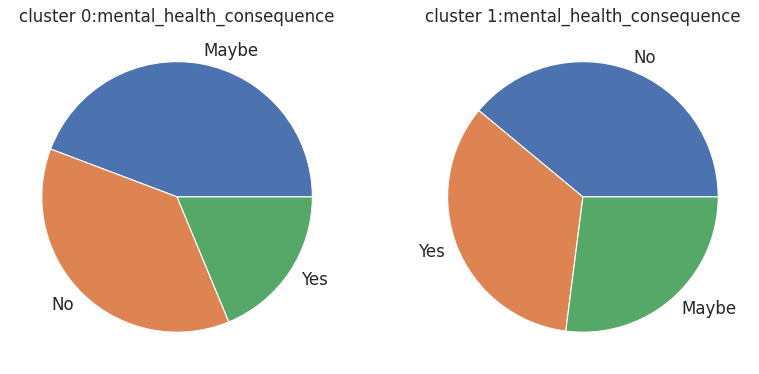

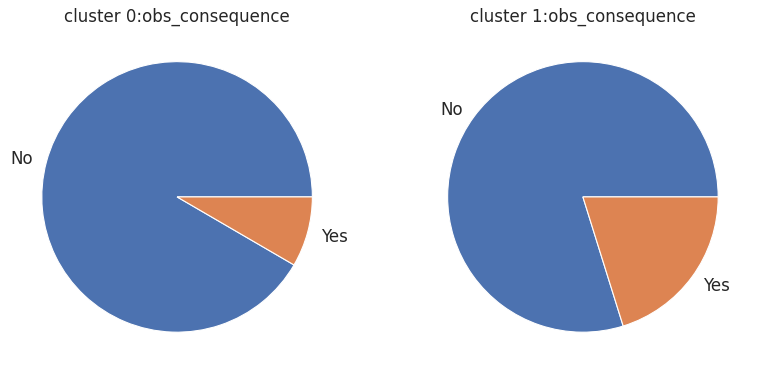

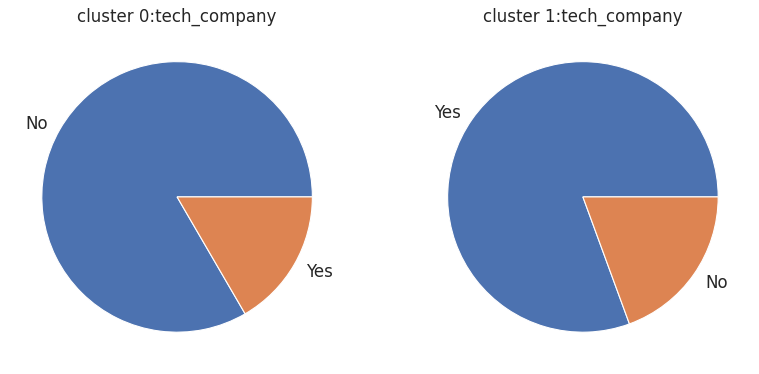

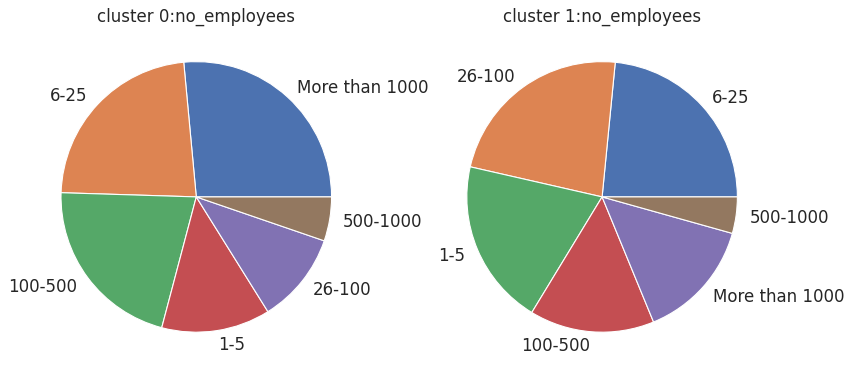

In [141]:
# get cluster 0 and cluster 1
df_clu_0 = df_9[df_9["Cluster"]==0]
df_clu_1 = df_9[df_9["Cluster"]==1]
for i, j in enumerate(lis):
    plt.figure(figsize=(12, 8), dpi=80)
    ax1 = plt.subplot2grid((1,2),(0,0))
    plt.pie(df_clu_0[j].value_counts(), labels=df_clu_0[j].unique(), textprops={'fontsize': 15})
    plt.title('cluster 0:'+ j, fontsize=15)

    ax1 = plt.subplot2grid((1,2),(0,1))
    plt.pie(df_clu_1[j].value_counts(), labels=df_clu_1[j].unique(), textprops={'fontsize': 15})
    plt.title('cluster 1:'+ j , fontsize=15)

#### Count plot to compare the portion of respose on survey questions for different clusters

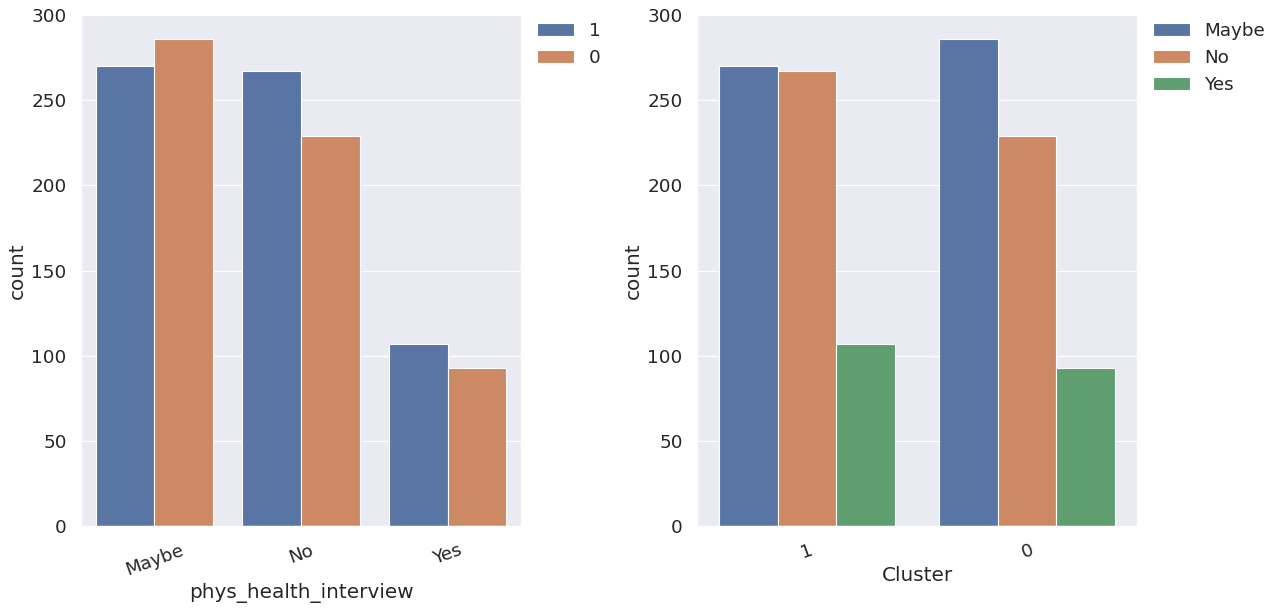

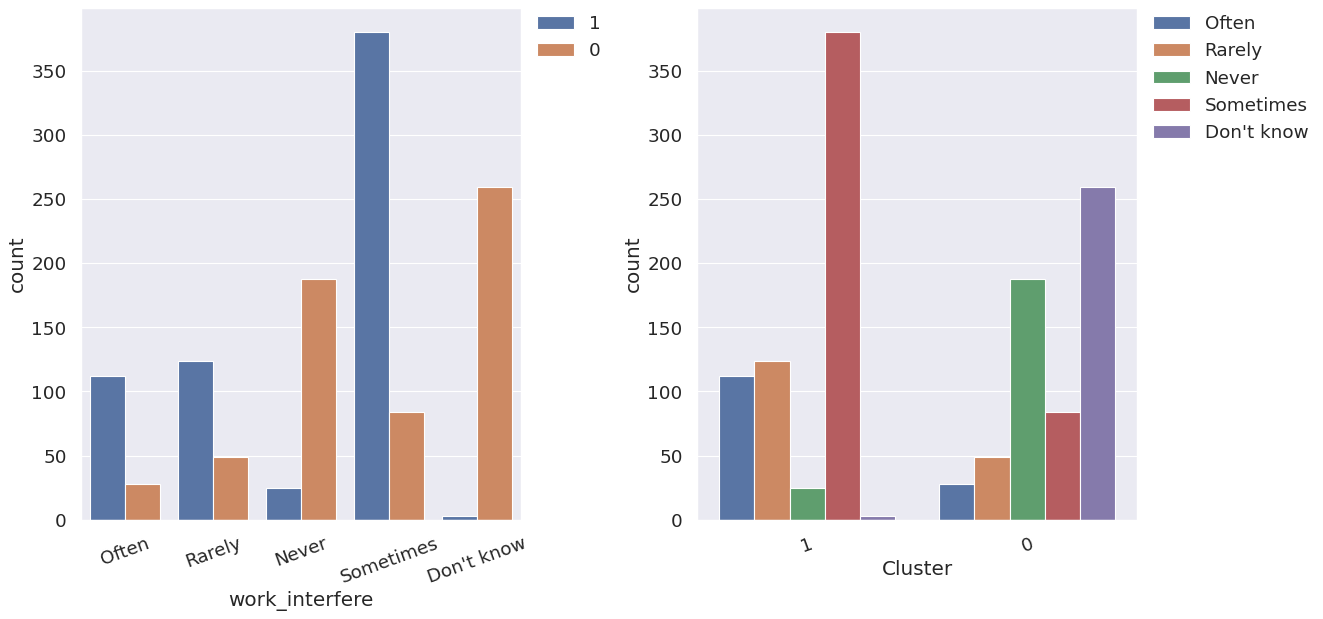

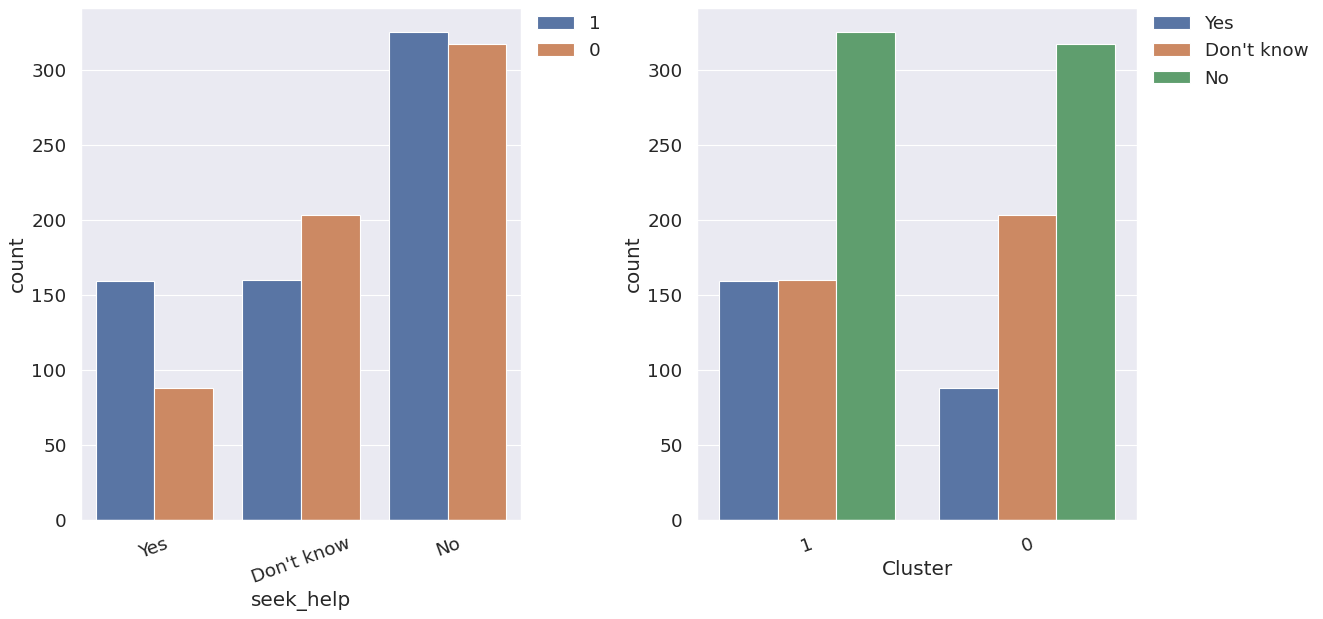

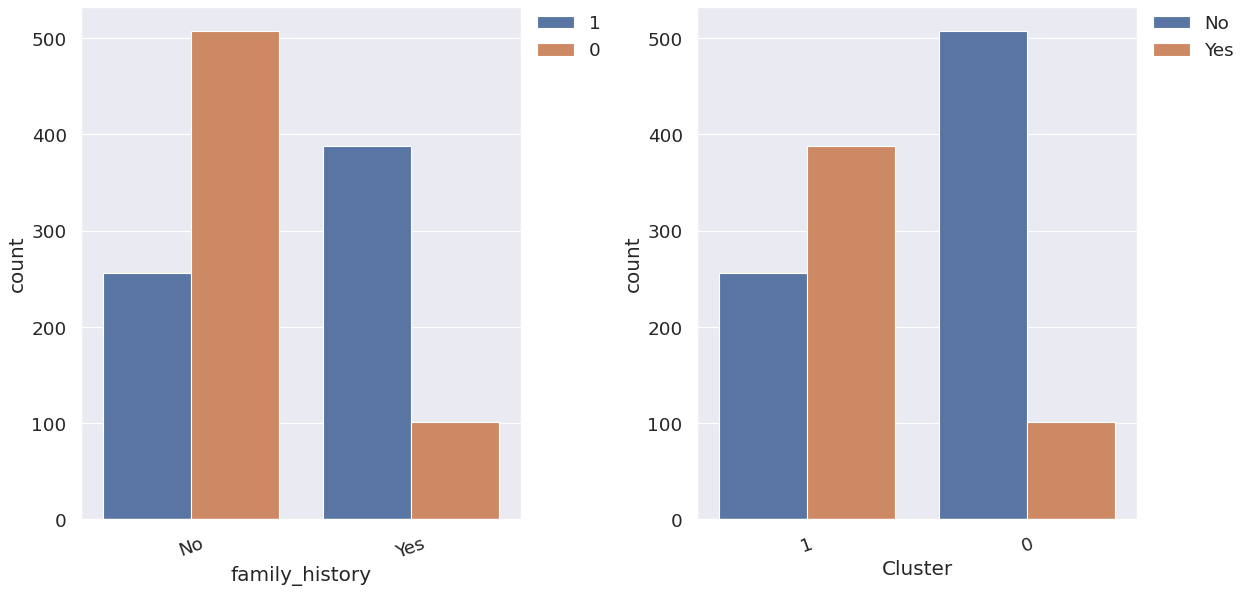

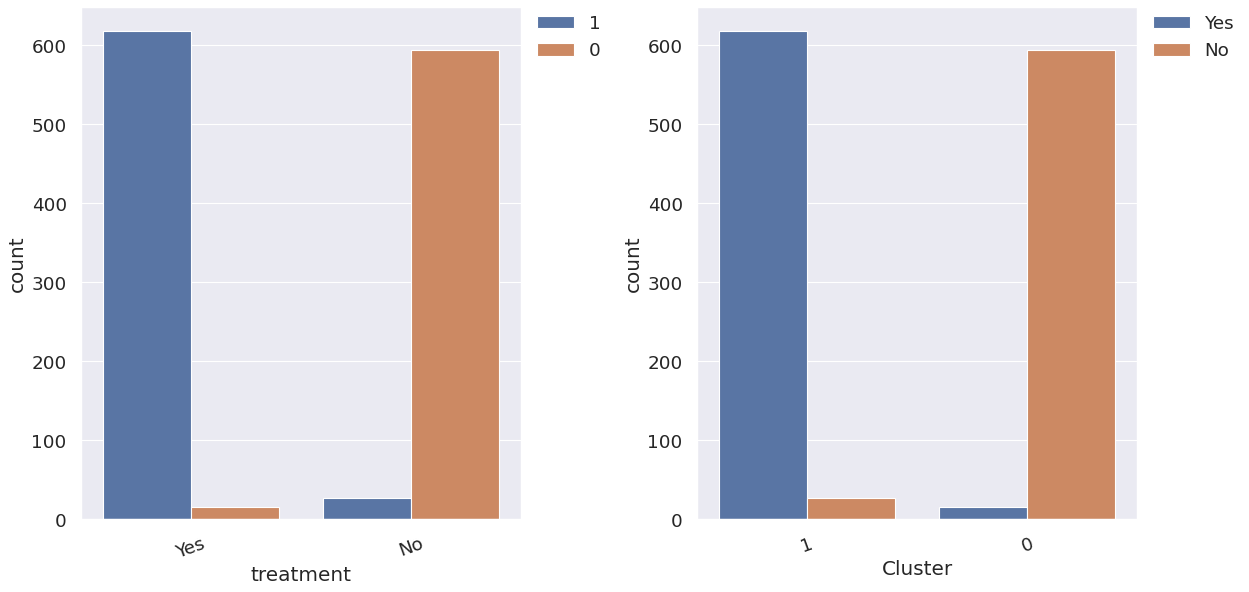

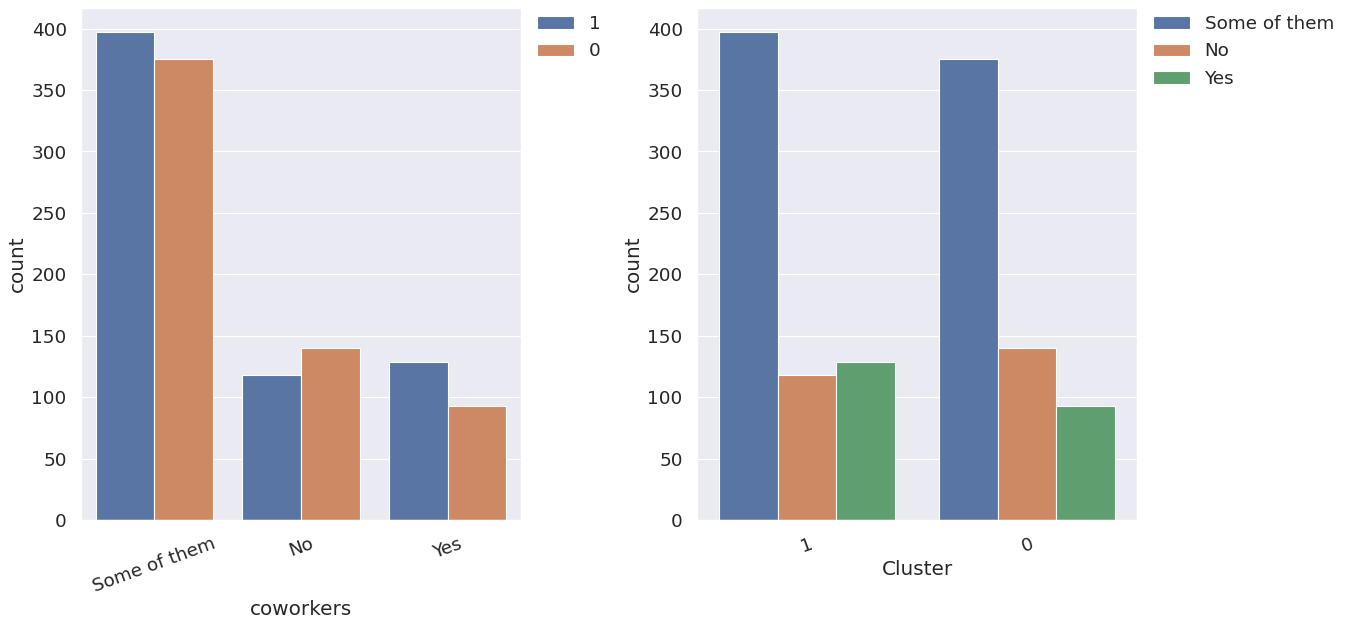

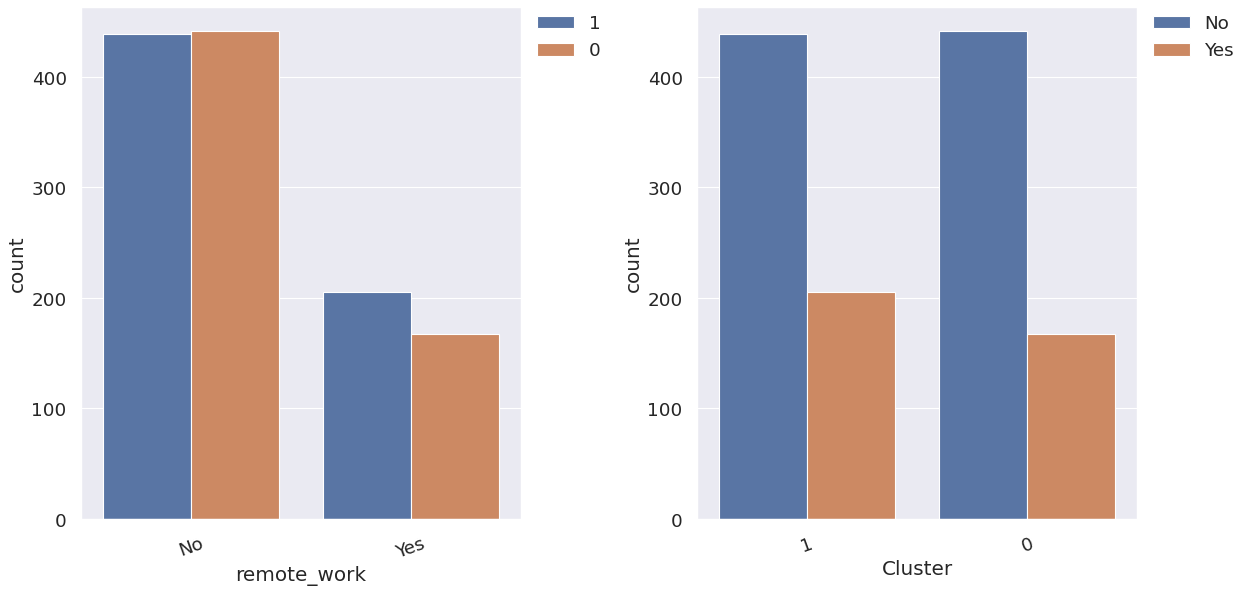

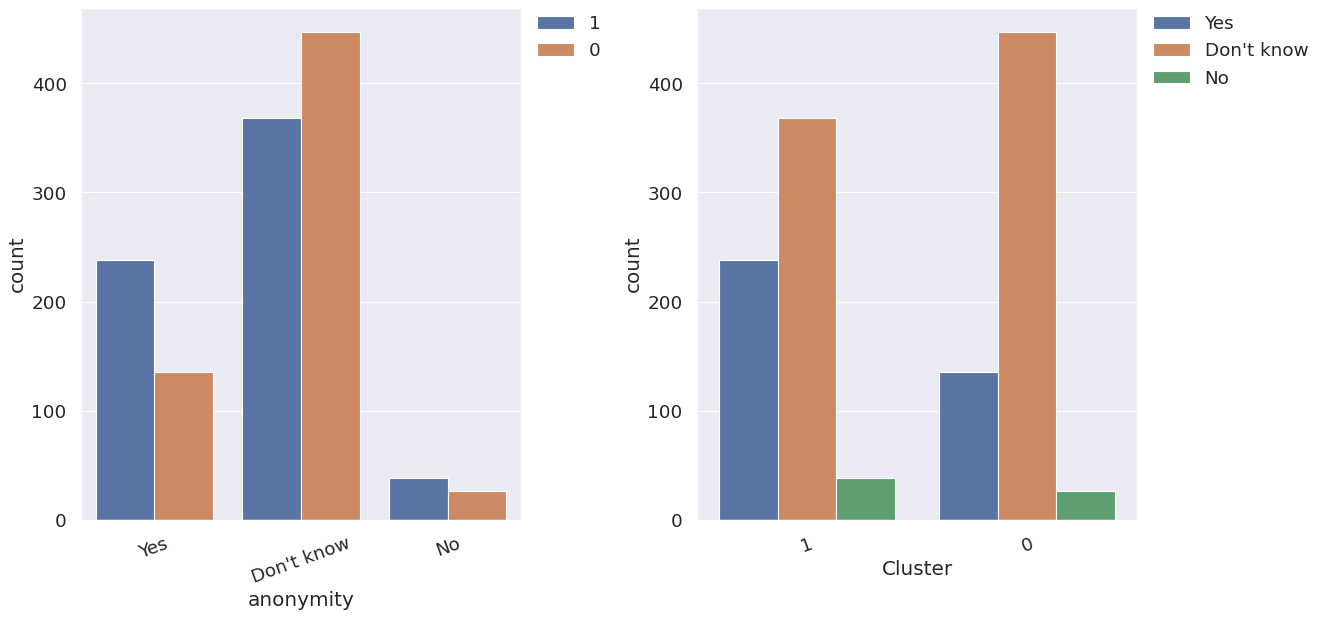

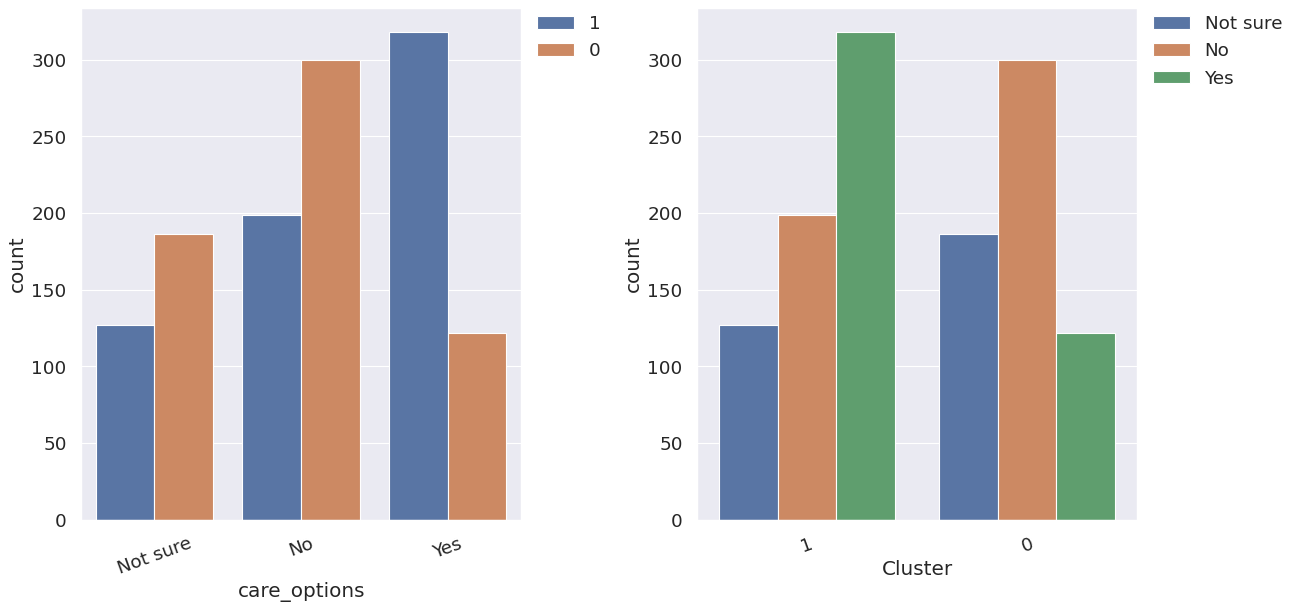

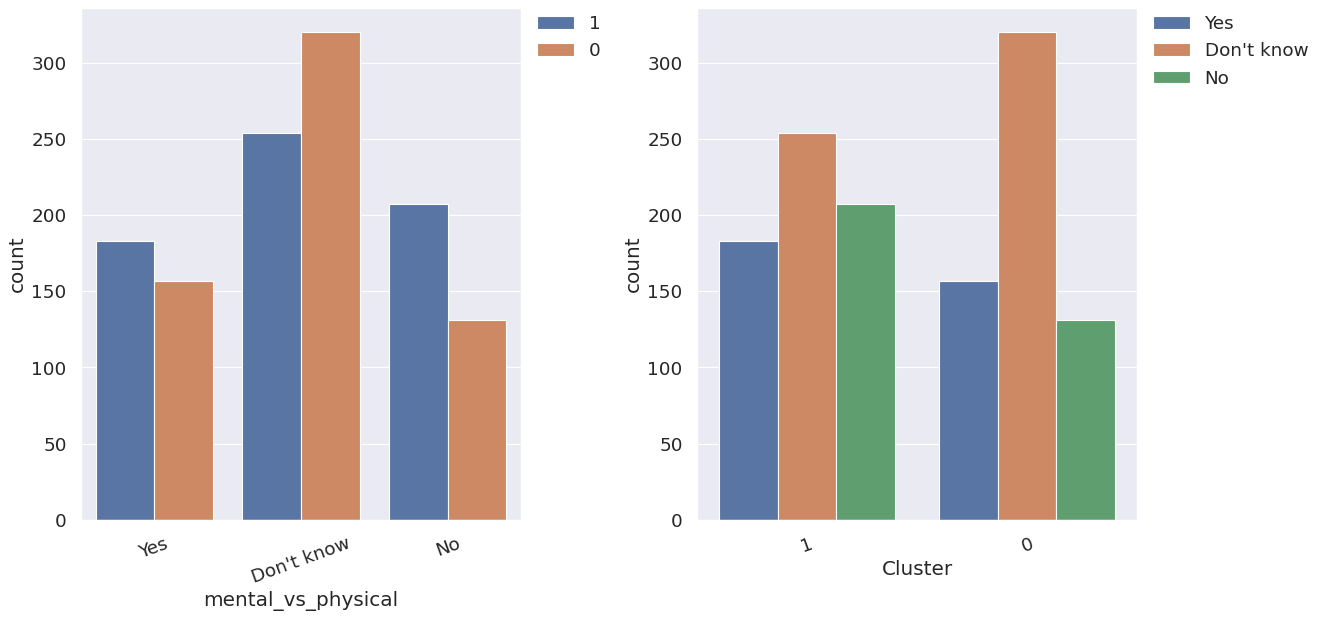

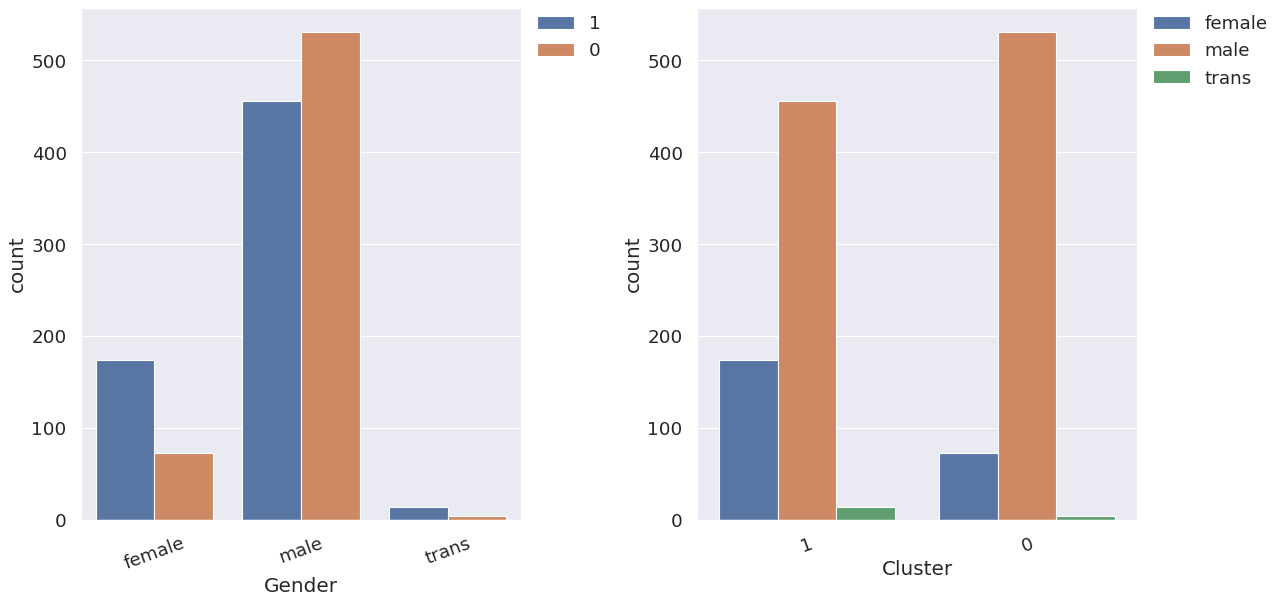

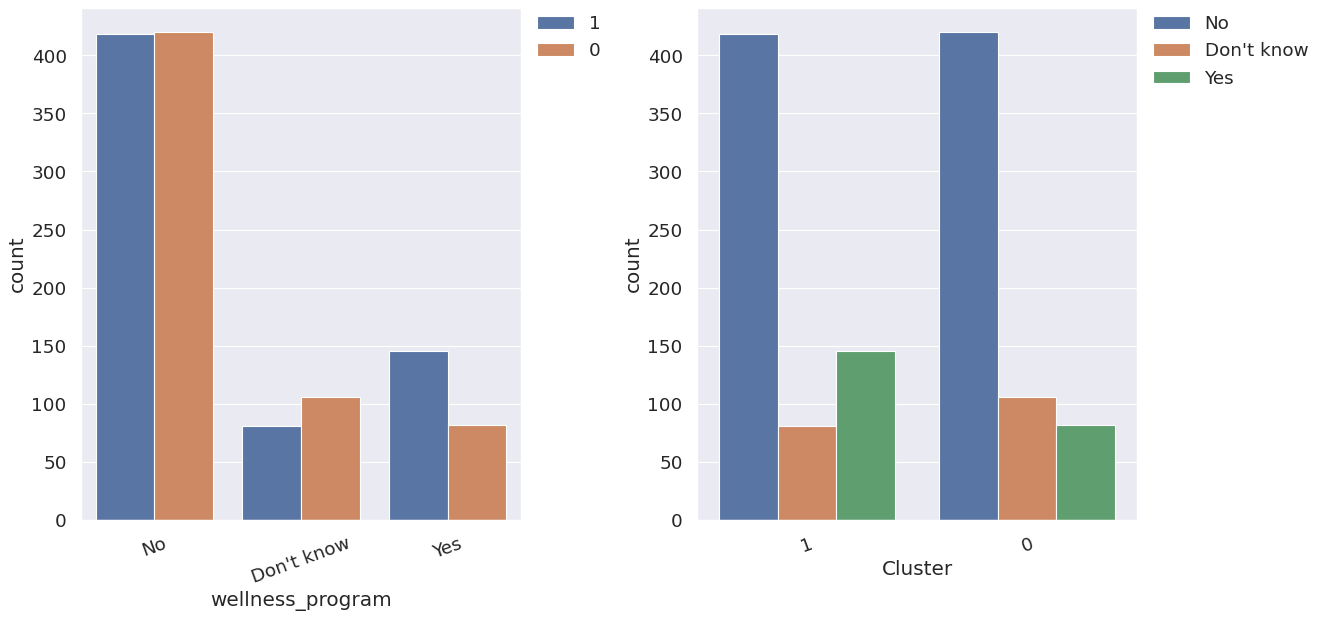

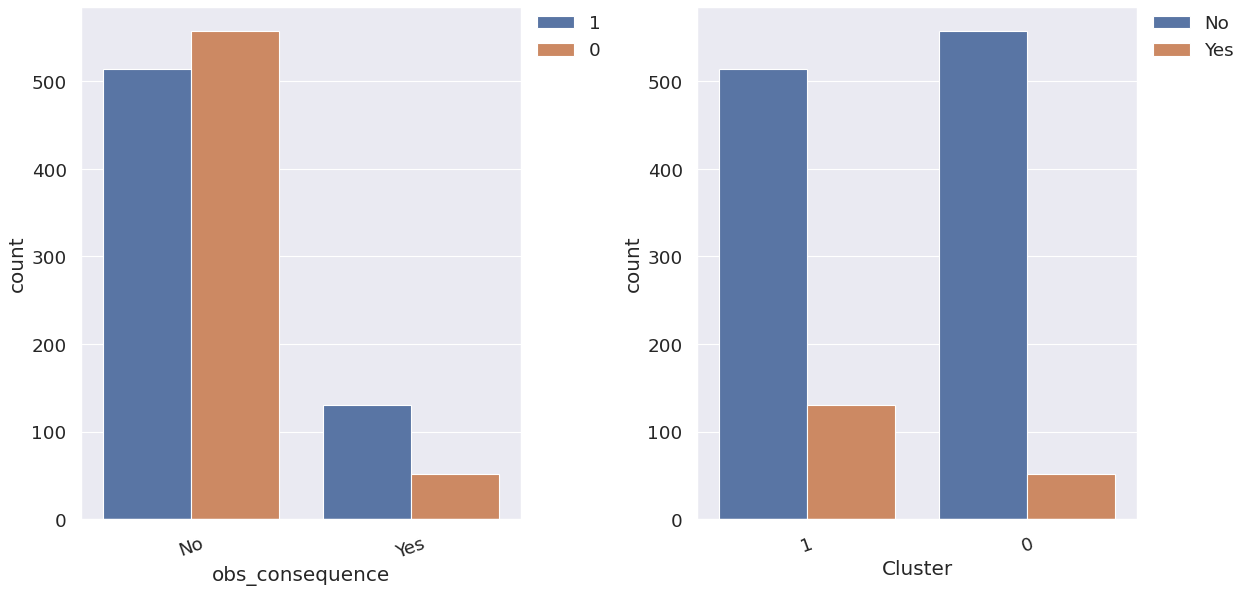

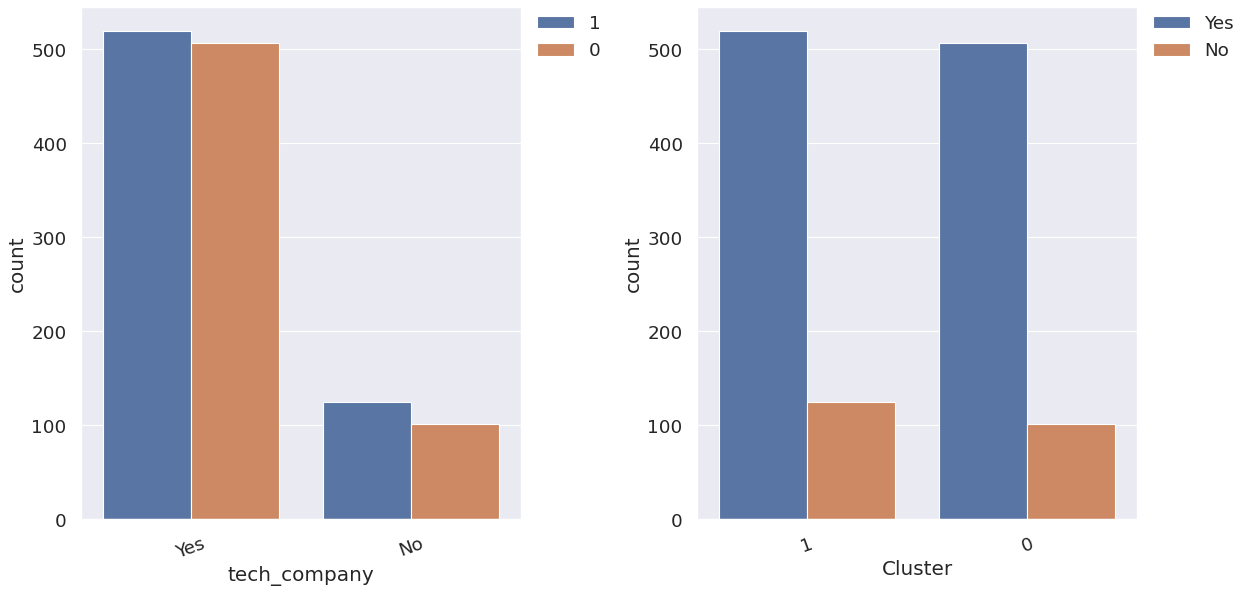

In [142]:
for i, j in enumerate(lis):
    plt.figure(figsize=(12, 8), dpi=80)
    ax1 = plt.subplot2grid((1,2),(0,0))
    sns.set_style('darkgrid')
    sns.countplot(x=j, hue = 'Cluster',  data= df_10)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.xticks(rotation = 20)
    
    ax1 = plt.subplot2grid((1,2),(0,1))
    sns.set_style('darkgrid')
    sns.countplot(x='Cluster', hue = j,  data= df_10)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation = 20)
    plt.show()

In [143]:
# plot the treatment distribution for different clusters
sns.set_style('darkgrid')
sns.countplot(x='Cluster', hue = 'treatment',  data= df_10)
plt.show()

Cluster 0 is mainly composed of respondents who don't seek treatment while cluster 1 is mostly respondents who seek for 

In [144]:
# plot the mental_vs_physical distribution for different clusters
sns.set_style('darkgrid')
sns.countplot(x='Cluster', hue = 'mental_vs_physical', data= df_10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Whether mental health is taken as seriously as the physical')
plt.show()

In [145]:
# plot the coworkers distribution for different clusters
sns.set_style('darkgrid')
sns.countplot(x='Cluster', hue = 'coworkers',  data= df_10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Would you be willing to discuss a mental health issue with your coworkers')
plt.show()

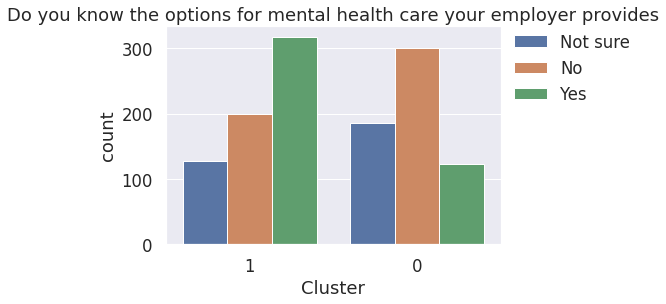

In [146]:
# plot the care_options distribution for different clusters
sns.set_style('darkgrid')
sns.countplot(x='Cluster', hue = 'care_options',  data= df_10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Do you know the options for mental health care your employer provides')
plt.show()

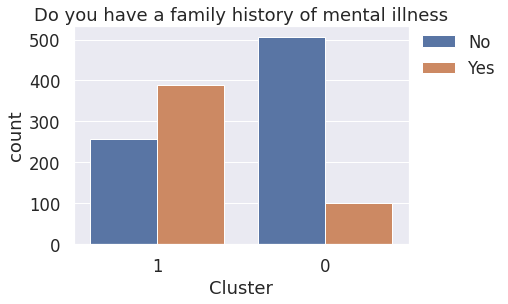

In [147]:
# plot the family_history distribution for different clusters
sns.set_style('darkgrid')
sns.countplot(x='Cluster', hue = 'family_history',  data= df_10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Do you have a family history of mental illness')
plt.show()

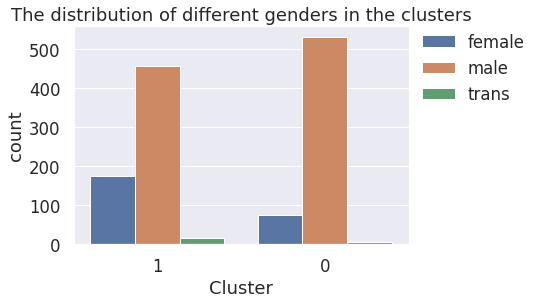

In [148]:
# plot the mental_health_consequence distribution for different clusters
sns.set_style('darkgrid')
sns.countplot(x='Cluster', hue = 'Gender',  data= df_10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('The distribution of different genders in the clusters')
plt.show()

## Clustering Insights


**Cluster 1:**
- Mostly the people who seek treatment
- Within cluster 1, respondents are more aware of the mental health benefits. Maybe it is because they need these benefits to pay for the bill. In addition, they don't think mental health is taken as seriously as the physical health.

**Cluster 0:**
- Mostly the people who don’t seek treatment
- Within cluster 1, respondents are less willign to discuss mental health issues withs their coworkers. Larger portion of respondents are male.


## 3.4 K-means with one-hot encoding

### 3.4.1 Feature engineering and K-means optimization

In [149]:
# copy the df_5 and drop comments column
df_11 = df_5.drop(['comments'], axis= 1).drop(['Country'], axis= 1)

In [150]:
# process numerical and categorical data separately
df_num = pd.DataFrame(df_11['Age'])
df_cat = df_11.select_dtypes(include='object')

# transform numrical data
for c in df_num.columns:
    pt = PowerTransformer()
    df_num.loc[:, c] = pt.fit_transform(np.array(df_num[c]).reshape(-1, 1))

# one-hot encoding
df_cat = pd.get_dummies(df_cat)
df_cat

# combine scaled numerical and categorical dummy variables in a dataframe
dfb2 = pd.concat([df_num, df_cat], axis=1)
dfb2.head()

Age  Gender_female  Gender_male  Gender_trans  self_employed_Don't Know  \
0  0.778              1            0             0                         1   
1  1.522              0            1             0                         1   
2  0.130              0            1             0                         1   
3 -0.015              0            1             0                         1   
4 -0.015              0            1             0                         1   

   self_employed_No  self_employed_Yes  family_history_No  family_history_Yes  \
0                 0                  0                  1                   0   
1                 0                  0                  1                   0   
2                 0                  0                  1                   0   
3                 0                  0                  0                   1   
4                 0                  0                  1                   0   

   treatment_No  ...  mental_health_interview_No  mental_health_interview_Yes  \
0             0  ...                           1                            0   
1             1  ...                           1                            0   
2             1  ...                           0                            1   
3             0  ...                           0                            0   
4             1  ...                           0                            1   

   phys_health_interview_Maybe  phys_health_interview_No  \
0                            1                         0   
1                            0                         1   
2                            0                         0   
3                            1                         0   
4                            0                         0   

   phys_health_interview_Yes  mental_vs_physical_Don't know  \
0                          0                              0   
1                          0                              1   
2                          1                              0   
3                          0                              0   
4                          1                              1   

   mental_vs_physical_No  mental_vs_physical_Yes  obs_consequence_No  \
0                      0                       1                   1   
1                      0                       0                   1   
2                      1                       0                   1   
3                      1                       0                   0   
4                      0                       0                   1   

   obs_consequence_Yes  
0                    0  
1                    0  
2                    0  
3                    1  
4                    0  

[5 rows x 69 columns]

In [151]:
# Standardize the data to have a mean of ~0 and a variance of 1
dfb3 = dfb2.copy()
dfb3 = StandardScaler().fit_transform(dfb3)
df_pca = dfb3.copy()

100%|██████████| 8/8 [00:11<00:00,  1.42s/it]


silhouette scores:
2 : 0.057
3 : 0.055
4 : 0.053
5 : 0.050
6 : 0.046
7 : 0.045
8 : 0.042
9 : 0.039
maximum silhouette score for 2 clusters:  0.057


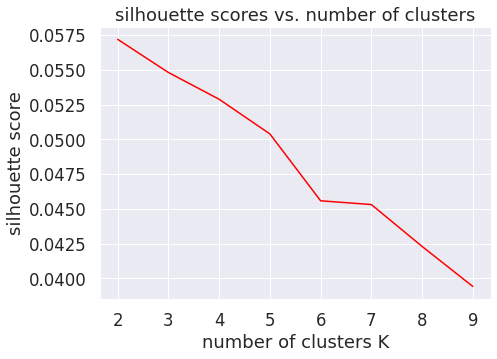

In [152]:
# find maximum silhouette score for up to 10 clusters
sil_scores = [silhouette_score(
                                dfb3, 
                                KMeans(n_clusters=k, random_state=RNDN). \
                                fit_predict(dfb3)) \
                                for k in tqdm(range(2,10))]

dict_sil = dict(zip(range(2,10), sil_scores))
print("silhouette scores:")
_ = [print(k, ":", f'{v:,.3f}') for k,v in dict_sil.items()]
K_sil_b3 = max(dict_sil, key=dict_sil.get)            # optimal clusters
sil_opt_b3 = dict_sil[K_sil_b3]                       # optimal silhouette score
print("maximum silhouette score for", f'{K_sil_b3:.0f} clusters: ', f'{sil_opt_b3:.3f}')

plt.figure(figsize=[7,5])
plt.plot(range(2,10), sil_scores, color="red")
plt.title("silhouette scores vs. number of clusters")
plt.xticks(np.arange(2,10,1))
plt.xlabel("number of clusters K")
plt.ylabel("silhouette score")
plt.show()

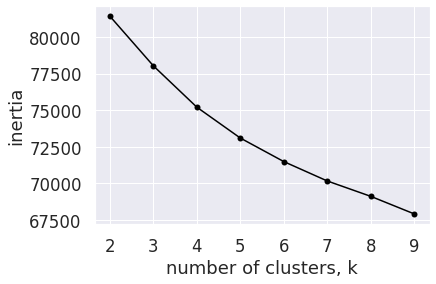

In [153]:
# kMeans
ks = range(2, 10)
inertias_pca = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_pca)
    
    # Append the inertia to the list of inertias
    inertias_pca.append(model.inertia_)

# plot the inertia vs cluster number curve
plt.plot(ks, inertias_pca, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [154]:
# inertia scores: confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concavem will detect knees
inertia_knee_b3 = KneeLocator(
        range(2,10), 
        inertias_pca, 
        S=0.1, curve="convex", direction="decreasing")

K_inertia_b3 = inertia_knee_b3.elbow   
print("elbow at k =", f'{K_inertia_b3:.0f} clusters')

elbow at k = 5 clusters


In [155]:
model = KMeans(n_clusters=K_sil_b3, random_state=RNDN)
res_b = model.fit_predict(dfb3)
# df_8.insert(0, "Cluster", res) 

### 3.4.2 PCA after one-hot encoding

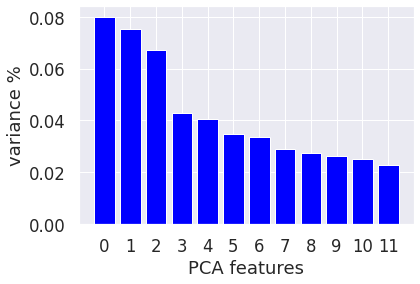

In [156]:
# principal components
pca = PCA(n_components=12)
res_pca = pca.fit_transform(dfb3)

# scree plot: variance drop-off after the fifth component; first 5 explain most of variance in data
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

df_pca = pd.DataFrame(res_pca)

In [157]:
# set the column names
df_pca.columns = ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 
                    'pca_5','pca_6','pca_7','pca_8','pca_9', 'pca_10', 'pca_11']
df_pca.insert(0, "Cluster", res_b) 

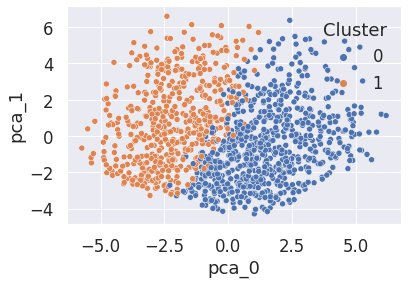

In [158]:
# plot the scatter plot of pca_0 vs pca_1
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(data=df_pca, x="pca_0", y="pca_1", hue="Cluster")
plt.show()

**one-hot encoding doesn't have as good performance as label encoding**

# 4. Conclusion

## 4.1 Summary

#### For people who have already sought mental health treatment, they are more aware of the options and benefits. However, they don't think mental health is taken as seriously as the physical health
**Solution: Better health care plans and human support**

#### For people who haven’t sought mental health treatment, they may feel the inclusion of mental health issues is not good enough
**Solution: Workplan mental health education**

## 4.2 Future work

4.2.1 Additional features (feeling, psychological behavior, mental health conditions)

4.2.2 other datasets (Demographic dataset of people in Tech)


## 4.3 Scale up

**If the dataset to be 100X what we have. How would we change our approach? How would we prepare a data pipeline?**

### Advantage:
1. North America to globally
2. More clustering groups to build

### Challenge:
1. Computation Power
2. Feature processing

### Solution:
1. Sampling
2. Parallel processing and modelling
3. CPU to GPU
4. Cloud based deployment